In [1]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textblob import TextBlob

import re

# Define a custom tokenizer using regex
def custom_tokenizer(text):
    return re.findall(r'\b\w+\b', str(text).lower())  # Matches words only




# Load Data
df = pd.read_csv('/content/reddit_data_with_sentiment_LastOne.csv')  # Replace with your actual file path

# Drop duplicate rows
df = df.drop_duplicates()

# Drop rows with missing critical data
df = df.dropna(subset=['post_content', 'comment_content'])

# Fill missing values in other columns
df = df.fillna('Unknown')

# Convert text to lowercase
df['post_content'] = df['post_content'].str.lower()
df['comment_content'] = df['comment_content'].str.lower()

# Remove punctuation and special characters
df['post_content'] = df['post_content'].str.replace('[^\w\s]', '', regex=True)
df['comment_content'] = df['comment_content'].str.replace('[^\w\s]', '', regex=True)

# Apply the tokenizer to your DataFrame
df['post_tokens'] = df['post_content'].apply(custom_tokenizer)
df['comment_tokens'] = df['comment_content'].apply(custom_tokenizer)

# Remove stop words
stop_words = set(stopwords.words('english'))
df['post_tokens'] = df['post_tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df['comment_tokens'] = df['comment_tokens'].apply(lambda x: [word for word in x if word not in stop_words])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Dataset Preview:

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23825 entries, 0 to 23824
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   post_title           23825 non-null  object
 1   post_content         22648 non-null  object
 2   post_upvotes         23825 non-null  int64 
 3   post_comments_count  23825 non-null  int64 
 4   post_created_utc     23825 non-null  object
 5   subreddit            23825 non-null  object
 6   keyword              23825 non-null  object
 7   post_url             23825 non-null  object
 8   comment_id           23825 non-null  object
 9   comment_author       23825 non-null  object
 10  comment_content      23822 non-null  object
 11  comment_upvotes      23825 non-null  int64 
 12  comment_created_utc  23825 non-null  object
 13  comment_depth        23825 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 2.5+ MB

Missing Values p

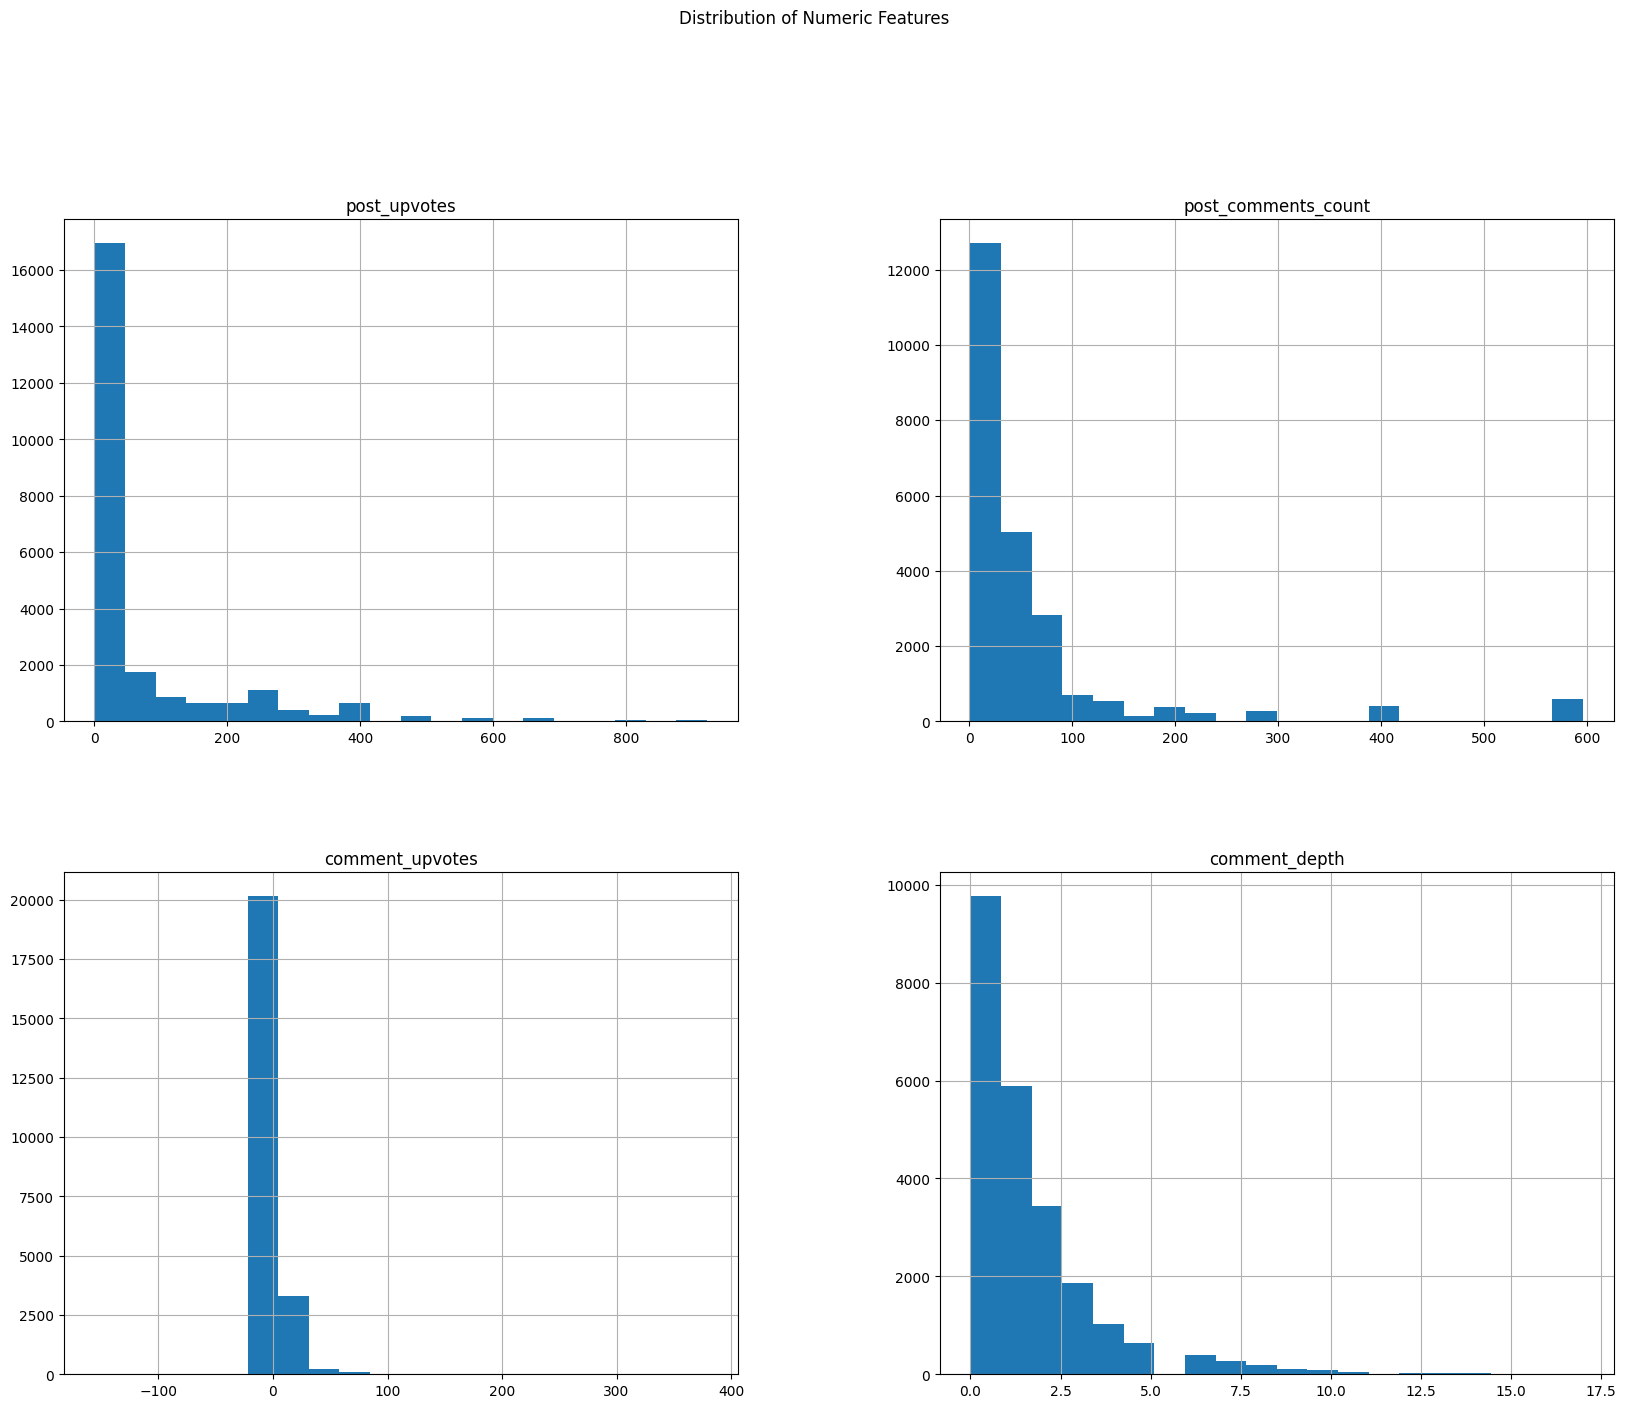

In [47]:
# Import necessary libraries
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with your actual dataset file path)
from google.colab import files


# Load the dataset into a Pandas DataFrame

df = pd.read_csv('/content/myositis_reddit_data_with_full_discussion.csv')

# Display the first few rows to understand the structure
print("Dataset Preview:")
df.head()

# Display dataset information
print("\nDataset Information:")
df.info()

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Show basic statistics for numerical columns
print("\nBasic Statistics for Numerical Columns:")
print(df.describe())

# Check for unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Display column data types
print("\nColumn Data Types:")
print(df.dtypes)

# Display the shape of the dataset (number of rows and columns)
print(f"\nDataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")

# Check for duplicate rows
print(f"\nNumber of Duplicate Rows: {df.duplicated().sum()}")

# Visualize column distributions (for numeric columns)
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(20, 15))
plt.suptitle("Distribution of Numeric Features", y=1.02)
plt.show()


In [2]:
# Filter for Myositis posts and comments
myositis_df = df[(df['subreddit'] == 'Myositis') & (df['is_relevant_post'] | df['is_relevant_comment'])]


<ipython-input-3-ccb1a9fdb6f6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')


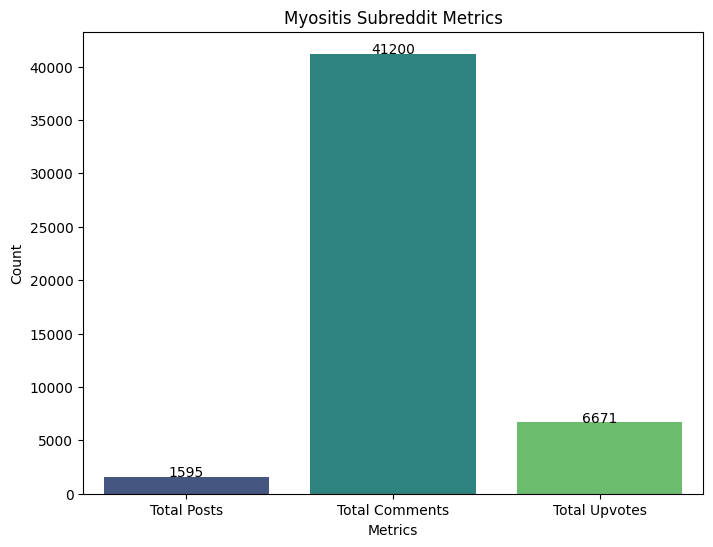

In [3]:
# Total counts
total_posts = len(myositis_df)
total_comments = myositis_df['post_comments_count'].sum()
total_upvotes = myositis_df['post_upvotes'].sum()

# Visualize
metrics = {
    "Total Posts": total_posts,
    "Total Comments": total_comments,
    "Total Upvotes": total_upvotes
}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title("Myositis Subreddit Metrics")
plt.ylabel("Count")
plt.xlabel("Metrics")
for i, val in enumerate(metrics.values()):
    plt.text(i, val + 50, str(val), ha='center')
plt.show()


<ipython-input-4-9b49ad86474b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myositis_df['post_sentiment'] = myositis_df['post_content'].apply(lambda x: TextBlob(x).sentiment.polarity)
<ipython-input-4-9b49ad86474b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myositis_df['comment_sentiment'] = myositis_df['comment_content'].apply(lambda x: TextBlob(x).sentiment.polarity)


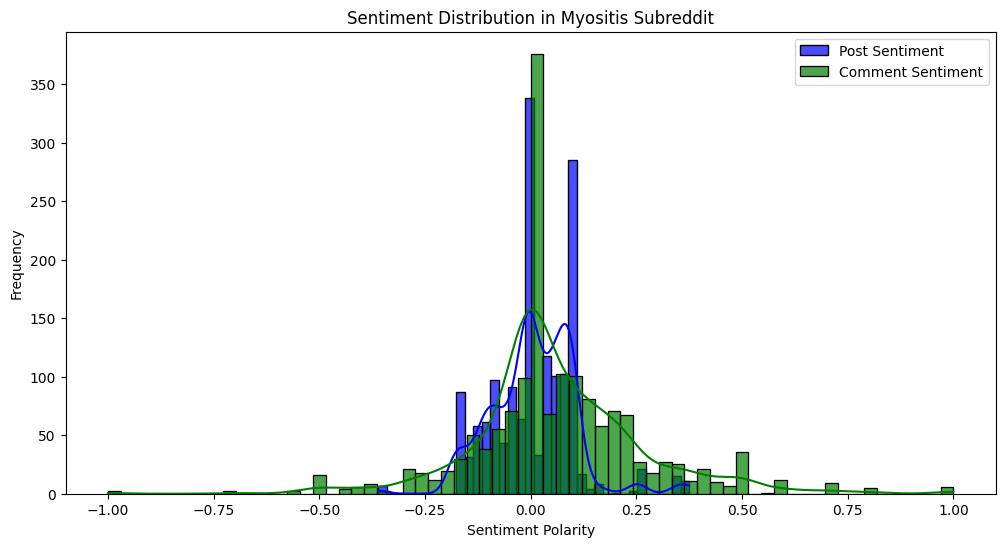

In [4]:
# Sentiment polarity
myositis_df['post_sentiment'] = myositis_df['post_content'].apply(lambda x: TextBlob(x).sentiment.polarity)
myositis_df['comment_sentiment'] = myositis_df['comment_content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize Sentiment
plt.figure(figsize=(12, 6))
sns.histplot(myositis_df['post_sentiment'], kde=True, color='blue', label='Post Sentiment', alpha=0.7)
sns.histplot(myositis_df['comment_sentiment'], kde=True, color='green', label='Comment Sentiment', alpha=0.7)
plt.title("Sentiment Distribution in Myositis Subreddit")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Sentiment Distribution for Posts:
Min Sentiment: -0.3607142857142857
Max Sentiment: 0.375
Mean Sentiment: 0.00666903283574951
Median Sentiment: 0.0

Most Negative Post:
post_content      my doctor has said whatever he outcome itll be the same type of drug   i tested and i was complaining of dead and  heavy legs and insane calf pain and cramps \n\nshe said those symptoms are not usually in line with as \n\nshe said i may have both of an overlap  not sure what than means  \n\nthe fatigue is absolutely insane 
post_sentiment                                                                                                                                                                                                                                                                                                                                -0.360714
Name: 262, dtype: object

Most Positive Post:
post_content      on watch for myositis and just wanted to see if this is what it looked like for

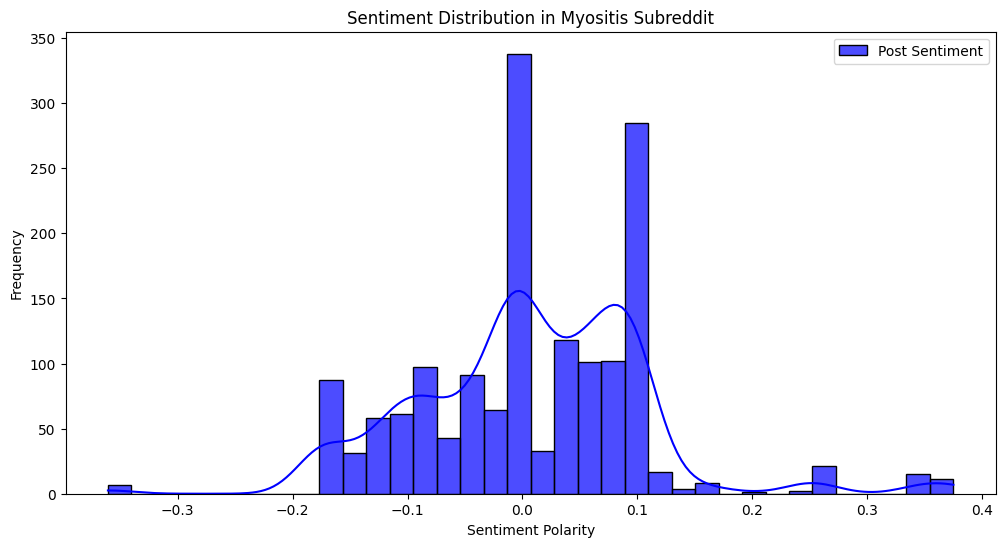

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Set Pandas options to display full content of text columns
pd.set_option('display.max_colwidth', None)  # This will ensure full content is shown

# Assuming the DataFrame `myositis_df` is already created and has sentiment polarity columns

# Filter for extreme positive and negative posts (polarity > 0.5 or < -0.5)
extreme_positive_posts = myositis_df[myositis_df['post_sentiment'] > 0.5]
extreme_negative_posts = myositis_df[myositis_df['post_sentiment'] < -0.5]

# Check the distribution of sentiment scores
print("Sentiment Distribution for Posts:")
print("Min Sentiment:", myositis_df['post_sentiment'].min())
print("Max Sentiment:", myositis_df['post_sentiment'].max())
print("Mean Sentiment:", myositis_df['post_sentiment'].mean())
print("Median Sentiment:", myositis_df['post_sentiment'].median())

# If the extreme posts are not found, let's remove threshold restrictions and find the post with the highest/lowest polarity
most_negative_post = myositis_df.loc[myositis_df['post_sentiment'].idxmin()]
most_positive_post = myositis_df.loc[myositis_df['post_sentiment'].idxmax()]
most_neutral_post = myositis_df.loc[(myositis_df['post_sentiment'].abs()).idxmin()]

# Print results
print("\nMost Negative Post:")
print(most_negative_post[['post_content', 'post_sentiment']])

print("\nMost Positive Post:")
print(most_positive_post[['post_content', 'post_sentiment']])

print("\nMost Neutral Post:")
print(most_neutral_post[['post_content', 'post_sentiment']])


# Visualize Sentiment Distribution
plt.figure(figsize=(12, 6))
sns.histplot(myositis_df['post_sentiment'], kde=True, color='blue', label='Post Sentiment', alpha=0.7)
plt.title("Sentiment Distribution in Myositis Subreddit")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Sentiment Distribution for Comments:
Min Sentiment: -1.0
Max Sentiment: 1.0
Mean Sentiment: 0.06417434123229311
Median Sentiment: 0.01805555555555553

Most Negative Comment:
comment_content      i get that foot grabby thing sometimes too its awful
comment_sentiment                                                    -1.0
Name: 754, dtype: object

Most Positive Comment:
comment_content      best of luck to you as well 
comment_sentiment                             1.0
Name: 128, dtype: object

Most Neutral Comment:
comment_content      what treatment
comment_sentiment               0.0
Name: 8, dtype: object


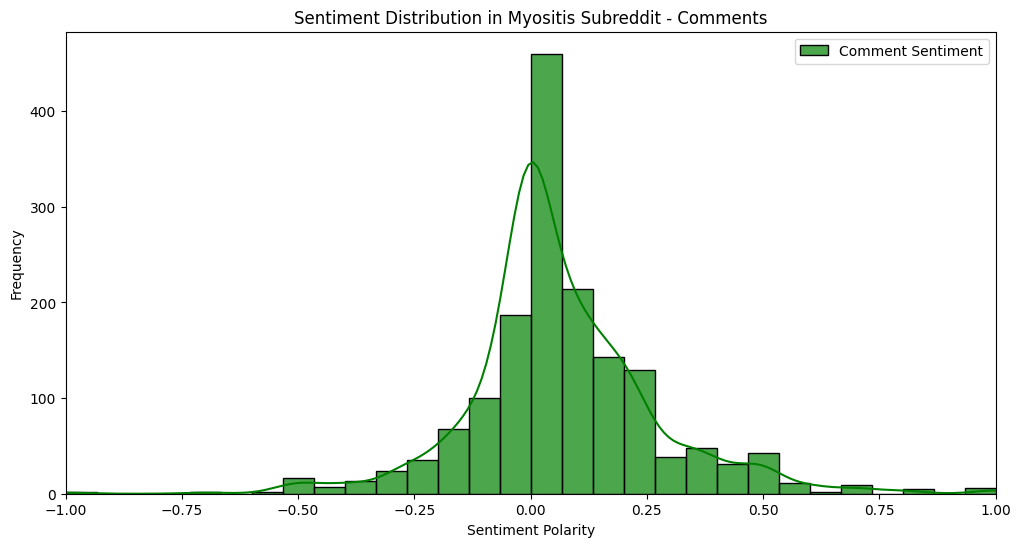

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Set Pandas options to display full content of text columns (for both posts and comments)
pd.set_option('display.max_colwidth', None)  # This will ensure full content is shown

# Assuming the DataFrame `myositis_df` is already created and has sentiment polarity columns

# Check the distribution of sentiment scores for comments (full sentiment range)
print("Sentiment Distribution for Comments:")
print("Min Sentiment:", myositis_df['comment_sentiment'].min())
print("Max Sentiment:", myositis_df['comment_sentiment'].max())
print("Mean Sentiment:", myositis_df['comment_sentiment'].mean())
print("Median Sentiment:", myositis_df['comment_sentiment'].median())

# If the extreme comments are not found, let's remove threshold restrictions and find the comment with the highest/lowest polarity
most_negative_comment = myositis_df.loc[myositis_df['comment_sentiment'].idxmin()]
most_positive_comment = myositis_df.loc[myositis_df['comment_sentiment'].idxmax()]
most_neutral_comment = myositis_df.loc[(myositis_df['comment_sentiment'].abs()).idxmin()]

# Print results for Comments
print("\nMost Negative Comment:")
print(most_negative_comment[['comment_content', 'comment_sentiment']])

print("\nMost Positive Comment:")
print(most_positive_comment[['comment_content', 'comment_sentiment']])

print("\nMost Neutral Comment:")
print(most_neutral_comment[['comment_content', 'comment_sentiment']])

# Visualize Sentiment Distribution for Comments (full range from -1 to 1)
plt.figure(figsize=(12, 6))
sns.histplot(myositis_df['comment_sentiment'], kde=True, color='green', label='Comment Sentiment', alpha=0.7, bins=30)
plt.xlim(-1, 1)  # Set x-axis limits from -1 to 1
plt.title("Sentiment Distribution in Myositis Subreddit - Comments")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


<ipython-input-7-85a025035b0d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(keyword_engagement.keys()), y=list(keyword_engagement.values()), palette='coolwarm')


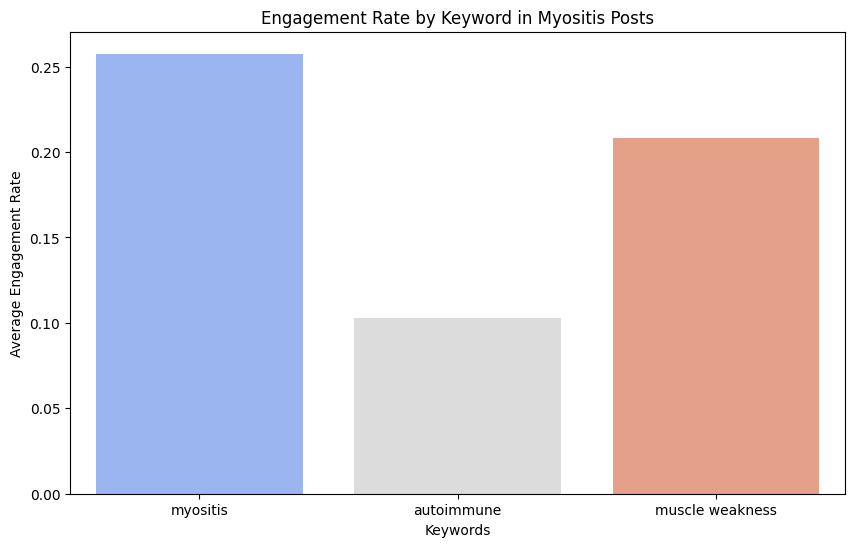

In [7]:
keywords = ['myositis', 'autoimmune', 'muscle weakness']
keyword_engagement = {
    keyword: myositis_df[myositis_df['post_content'].str.contains(keyword, na=False)]['post_engagement_rate'].mean()
    for keyword in keywords
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(keyword_engagement.keys()), y=list(keyword_engagement.values()), palette='coolwarm')
plt.title("Engagement Rate by Keyword in Myositis Posts")
plt.xlabel("Keywords")
plt.ylabel("Average Engagement Rate")
plt.show()


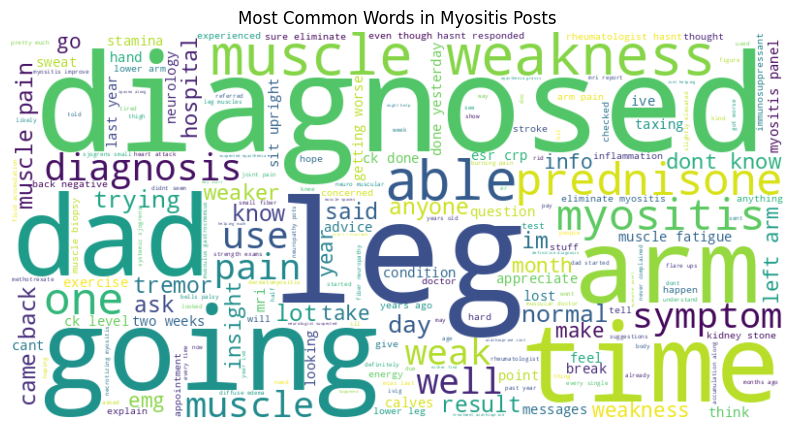

In [8]:
post_text = " ".join(myositis_df['post_content'].tolist())
wordcloud = WordCloud(background_color='white', max_words=200, width=800, height=400).generate(post_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Myositis Posts")
plt.show()


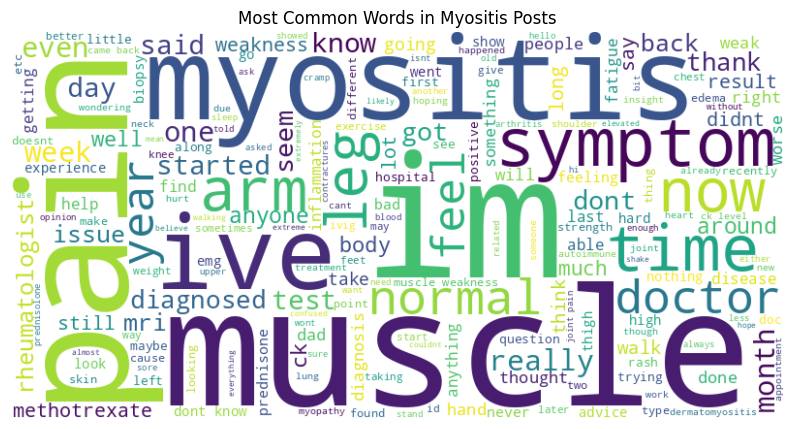

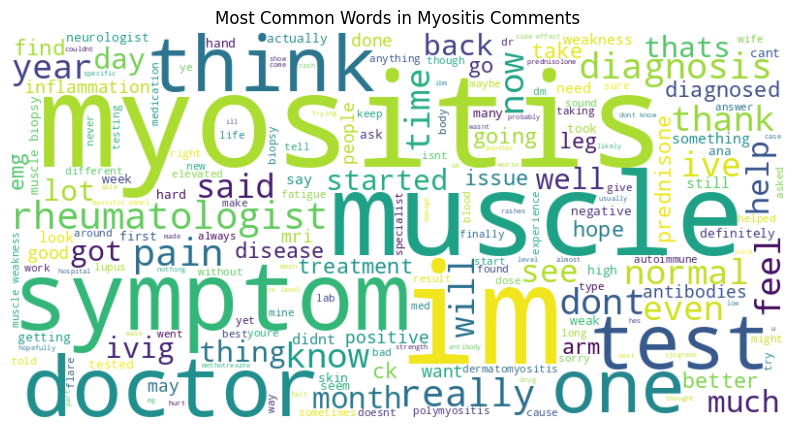

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Drop duplicates from posts and comments based on content
unique_posts = myositis_df.drop_duplicates(subset='post_content')
unique_comments = myositis_df.drop_duplicates(subset='comment_content')

# Generate word cloud for posts
post_text = " ".join(unique_posts['post_content'].dropna().tolist())
post_wordcloud = WordCloud(background_color='white', max_words=200, width=800, height=400).generate(post_text)

# Generate word cloud for comments
comment_text = " ".join(unique_comments['comment_content'].dropna().tolist())
comment_wordcloud = WordCloud(background_color='white', max_words=200, width=800, height=400).generate(comment_text)

# Plot the word cloud for posts
plt.figure(figsize=(10, 6))
plt.imshow(post_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Myositis Posts")
plt.show()

# Plot the word cloud for comments
plt.figure(figsize=(10, 6))
plt.imshow(comment_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Myositis Comments")
plt.show()


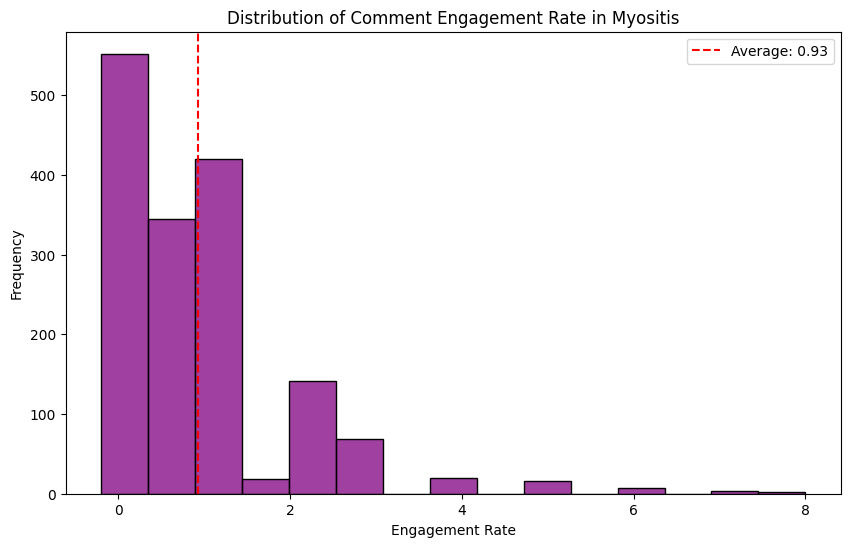

In [10]:
# Average comment depth
avg_comment_depth = myositis_df['comment_engagement_rate'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(myositis_df['comment_engagement_rate'], kde=False, bins=15, color='purple')
plt.title("Distribution of Comment Engagement Rate in Myositis")
plt.xlabel("Engagement Rate")
plt.ylabel("Frequency")
plt.axvline(avg_comment_depth, color='red', linestyle='--', label=f'Average: {avg_comment_depth:.2f}')
plt.legend()
plt.show()


<ipython-input-11-9efe47dd5dec>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_contributors, x='total_engagement', y='post_author', palette='viridis')


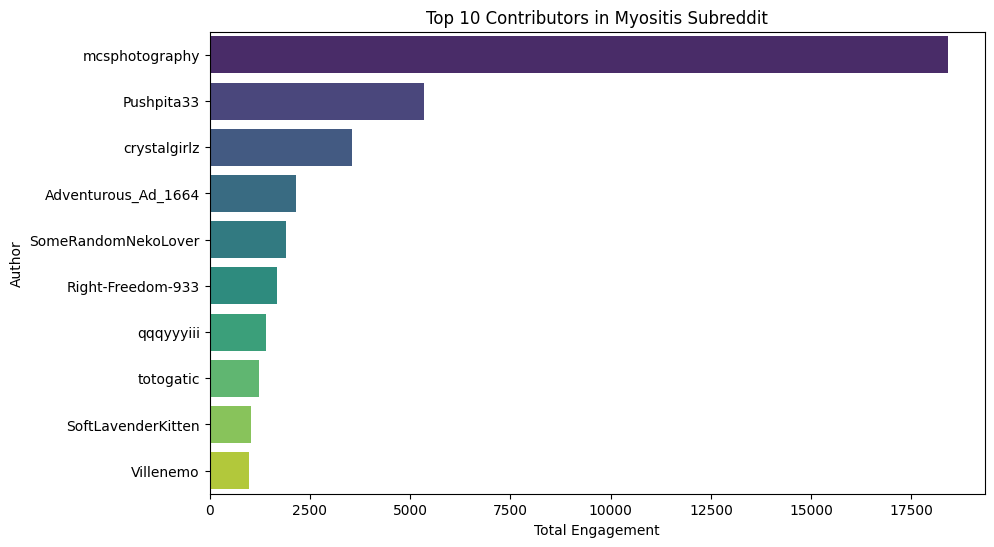

In [11]:
top_contributors = myositis_df.groupby('post_author').agg({
    'post_upvotes': 'sum',
    'post_comments_count': 'sum'
}).reset_index()

# Add total engagement
top_contributors['total_engagement'] = top_contributors['post_upvotes'] + top_contributors['post_comments_count']
top_contributors = top_contributors.sort_values('total_engagement', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_contributors, x='total_engagement', y='post_author', palette='viridis')
plt.title("Top 10 Contributors in Myositis Subreddit")
plt.xlabel("Total Engagement")
plt.ylabel("Author")
plt.show()


<ipython-input-12-e16a96d733ed>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_contributors, x='total_engagement', y='post_author', palette='viridis')


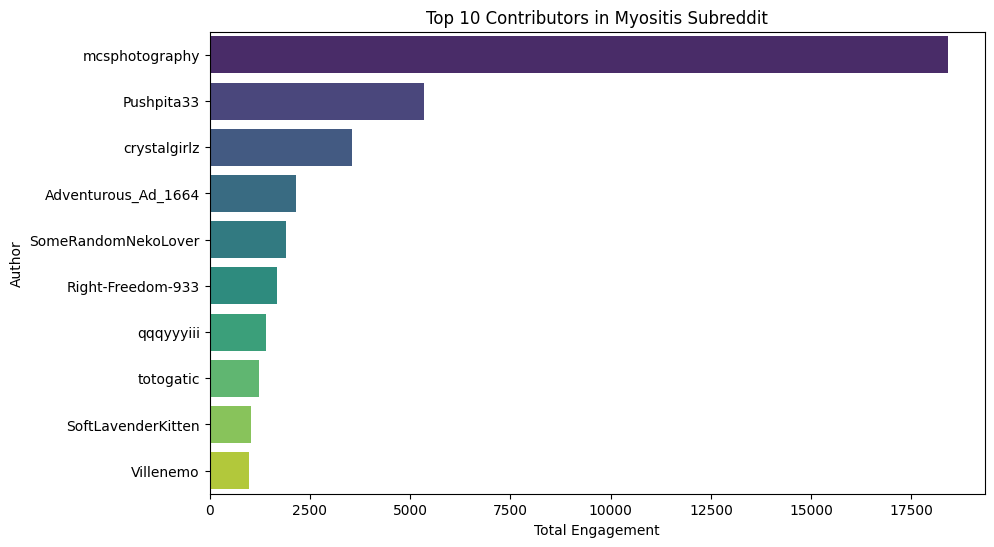

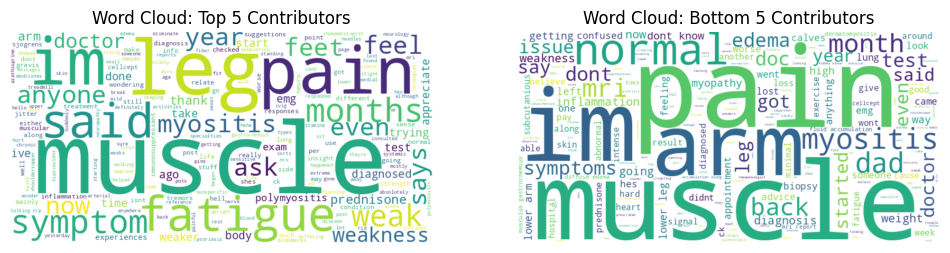

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Step 1: Group by 'post_author' and calculate total engagement
top_contributors = myositis_df.groupby('post_author').agg({
    'post_upvotes': 'sum',
    'post_comments_count': 'sum'
}).reset_index()

# Step 2: Add total engagement and sort to find top 10 contributors
top_contributors['total_engagement'] = top_contributors['post_upvotes'] + top_contributors['post_comments_count']
top_contributors = top_contributors.sort_values('total_engagement', ascending=False).head(10)

# Step 3: Find the top 5 and bottom 5 contributors
top_5_contributors = top_contributors.head(5)
bottom_5_contributors = top_contributors.tail(5)

# Step 4: Filter posts from top 5 and bottom 5 contributors
top_5_posts = myositis_df[myositis_df['post_author'].isin(top_5_contributors['post_author'])]
bottom_5_posts = myositis_df[myositis_df['post_author'].isin(bottom_5_contributors['post_author'])]

# Step 5: Remove duplicates from both posts and comments
top_5_posts = top_5_posts.drop_duplicates(subset=['post_content'])
bottom_5_posts = bottom_5_posts.drop_duplicates(subset=['post_content'])

# Step 6: Generate word clouds for top 5 and bottom 5 contributors' discussions

# Word cloud for top 5 contributors
top_5_text = " ".join(top_5_posts['post_content'].dropna().tolist())
top_5_wordcloud = WordCloud(background_color='white', max_words=200, width=800, height=400).generate(top_5_text)

# Word cloud for bottom 5 contributors
bottom_5_text = " ".join(bottom_5_posts['post_content'].dropna().tolist())
bottom_5_wordcloud = WordCloud(background_color='white', max_words=200, width=800, height=400).generate(bottom_5_text)

# Step 7: Plot the bar chart for top 10 contributors
plt.figure(figsize=(10, 6))
sns.barplot(data=top_contributors, x='total_engagement', y='post_author', palette='viridis')
plt.title("Top 10 Contributors in Myositis Subreddit")
plt.xlabel("Total Engagement")
plt.ylabel("Author")
plt.show()

# Step 8: Plot word clouds for discussions from top 5 and bottom 5 contributors
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(top_5_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud: Top 5 Contributors")

plt.subplot(1, 2, 2)
plt.imshow(bottom_5_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud: Bottom 5 Contributors")

plt.show()


In [13]:
import pandas as pd

# Define keywords for help-seeking and support-offering
help_seeking_keywords = ['help', 'advice', 'question', 'anyone', 'please']
support_offering_keywords = ['hope', 'advice', 'suggest', 'recommend', 'understand', 'sharing']

# Categorize posts as help-seeking or support-offering
def categorize_post(content):
    content = content.lower()
    if any(word in content for word in help_seeking_keywords):
        return 'help-seeking'
    elif any(word in content for word in support_offering_keywords):
        return 'support-offering'
    else:
        return 'neutral'

# Apply the categorization to the post content
myositis_df['post_category'] = myositis_df['post_content'].apply(categorize_post)

# Step 1: Get the first and last contributors based on total engagement
first_contributor = top_contributors.iloc[0]['post_author']
last_contributor = top_contributors.iloc[-1]['post_author']

# Step 2: Filter posts from the first and last contributors and remove duplicates
first_contributor_posts = myositis_df[myositis_df['post_author'] == first_contributor].drop_duplicates(subset=['post_content'])
last_contributor_posts = myositis_df[myositis_df['post_author'] == last_contributor].drop_duplicates(subset=['post_content'])

# Step 3: Categorize the posts for both contributors
first_contributor_role = first_contributor_posts['post_category'].mode()[0]  # Get the most common category for the first contributor
last_contributor_role = last_contributor_posts['post_category'].mode()[0]    # Get the most common category for the last contributor

# Step 4: Output the roles of the first and last contributors
print(f"Role of {first_contributor} in the community: {first_contributor_role}")
print(f"Role of {last_contributor} in the community: {last_contributor_role}")

# Step 1: Identify the bottom contributors (those not in the top 10)
bottom_contributors = myositis_df[~myositis_df['post_author'].isin(top_contributors['post_author'])]

# Step 2: Find the bottom contributor (the one with the least engagement, who is not in the top 10)
bottom_contributor = bottom_contributors.groupby('post_author').agg({
    'post_upvotes': 'sum',
    'post_comments_count': 'sum'
}).reset_index()

# Add total engagement
bottom_contributor['total_engagement'] = bottom_contributor['post_upvotes'] + bottom_contributor['post_comments_count']
bottom_contributor = bottom_contributor.sort_values('total_engagement', ascending=True).iloc[0]

# Step 3: Filter posts from the bottom contributor and remove duplicates
bottom_contributor_posts = myositis_df[myositis_df['post_author'] == bottom_contributor['post_author']].drop_duplicates(subset=['post_content'])

# Step 4: Categorize the posts for the bottom contributor
bottom_contributor_role = bottom_contributor_posts['post_category'].mode()[0]  # Get the most common category for the bottom contributor

# Step 5: Output the role of the bottom contributor
print(f"Role of {bottom_contributor['post_author']} in the community: {bottom_contributor_role}")



Role of mcsphotography in the community: help-seeking
Role of Villenemo in the community: neutral
Role of RIPGoats12 in the community: neutral


<ipython-input-13-b7b25453707c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myositis_df['post_category'] = myositis_df['post_content'].apply(categorize_post)


In [14]:
# Step 1: Filter posts for 'mcsphotography' and 'Villenemo'
mcsphotography_posts = myositis_df[myositis_df['post_author'] == 'mcsphotography'].drop_duplicates(subset=['post_content'])
villenemo_posts = myositis_df[myositis_df['post_author'] == 'Villenemo'].drop_duplicates(subset=['post_content'])

# Step 2: Display some of the posts that indicate their roles in the community
mcsphotography_help_seeking_posts = mcsphotography_posts[mcsphotography_posts['post_category'] == 'help-seeking']
villenemo_neutral_posts = villenemo_posts[villenemo_posts['post_category'] == 'neutral']

# Step 3: Output the posts that support their roles
print(f"Posts from mcsphotography that indicate 'help-seeking' role:\n")
print(mcsphotography_help_seeking_posts[['post_content']].head(5))  # Show top 5 help-seeking posts

print(f"\nPosts from Villenemo that indicate 'neutral' role:\n")
print(villenemo_neutral_posts[['post_content']].head(5))  # Show top 5 neutral posts

# Step 1: Filter the posts of the bottom contributor (e.g., RIPGoats12)
bottom_contributor_posts = myositis_df[myositis_df['post_author'] == 'RIPGoats12'].drop_duplicates(subset=['post_content'])

# Step 2: Display the posts to prove the 'neutral' role
print(f"Posts from {bottom_contributor['post_author']} proving the neutral role:")
for index, row in bottom_contributor_posts.iterrows():
    print(f"\nPost {index+1}:")
    print(f"Content: {row['post_content']}")
    print(f"Category: {row['post_category']}")



Posts from mcsphotography that indicate 'help-seeking' role:

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             post_content
421  i was diagnosed with systemic sjogrens small fiber neuropathy pots and mcas last year ive been trying an immunosuppressant and ivig for treatment azathioprine isnt helping much so i may start rituximab i have flare ups where my muscles are so weak and i have tremors if i use my muscles its primarily in my arms and legs my neurologist suspected m

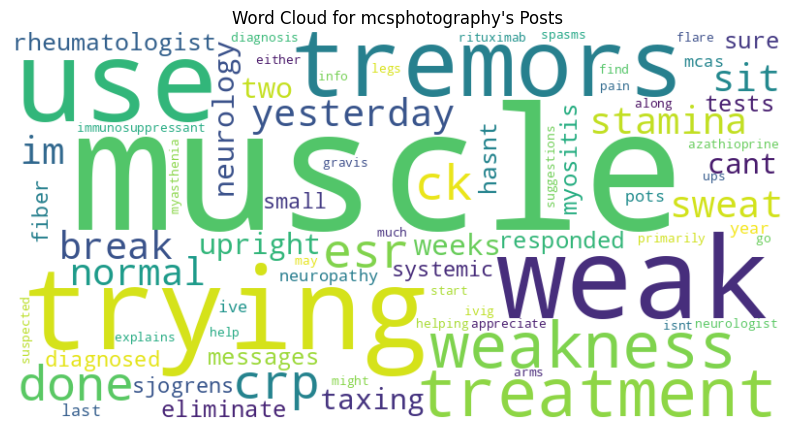

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Step 1: Find the first contributor (highest total engagement)
first_contributor = top_contributors.iloc[0]['post_author']

# Step 2: Filter posts from the first contributor
first_contributor_posts = myositis_df[myositis_df['post_author'] == first_contributor]

# Step 3: Remove duplicates from the posts of the first contributor
first_contributor_posts = first_contributor_posts.drop_duplicates(subset=['post_content'])

# Step 4: Generate the word cloud for the first contributor's posts
first_contributor_text = " ".join(first_contributor_posts['post_content'].dropna().tolist())
first_contributor_wordcloud = WordCloud(background_color='white', max_words=200, width=800, height=400).generate(first_contributor_text)

# Step 5: Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(first_contributor_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"Word Cloud for {first_contributor}'s Posts")
plt.show()


In [16]:
from sklearn.decomposition import LatentDirichletAllocation

# Combine all text
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(myositis_df['post_content'])

# LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display topics
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[-no_top_words:]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)


Topic 1:
like insight muscle time really symptoms myositis contractures im thank
Topic 2:
lung results panel weakness ck symptoms biopsy muscle myositis pain
Topic 3:
years hes getting diagnosed muscle started months just pain dad
Topic 4:
lower dont ck mri pain im normal myositis muscles muscle
Topic 5:
dont weakness ive legs weak muscles pain arms im muscle


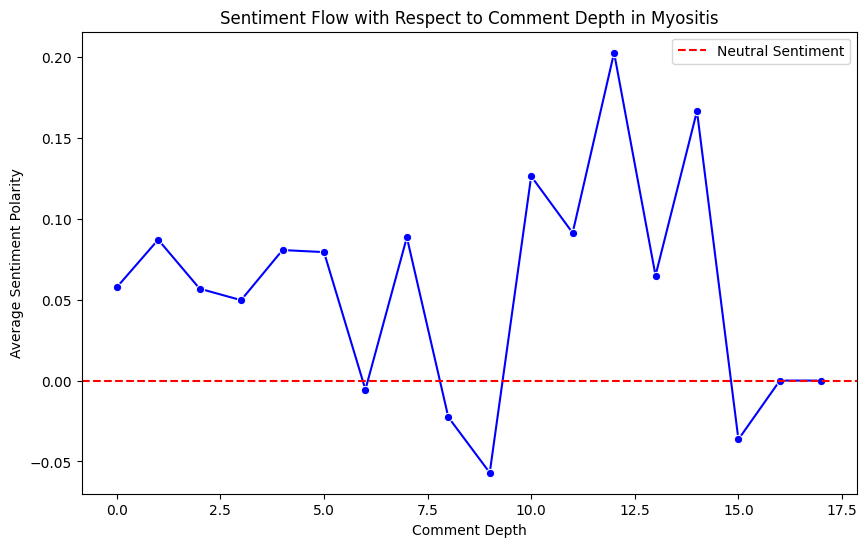

In [17]:
# Filter for Myositis subreddit
myositis_df = df[df['subreddit'] == 'Myositis']

# Average sentiment by comment depth
sentiment_flow = myositis_df.groupby('comment_depth')['comment_sentiment'].mean().reset_index()

# Visualize sentiment flow
plt.figure(figsize=(10, 6))
sns.lineplot(data=sentiment_flow, x='comment_depth', y='comment_sentiment', marker='o', color='blue')
plt.title("Sentiment Flow with Respect to Comment Depth in Myositis")
plt.xlabel("Comment Depth")
plt.ylabel("Average Sentiment Polarity")
plt.axhline(0, color='red', linestyle='--', label="Neutral Sentiment")
plt.legend()
plt.show()


In [18]:
import numpy as np

# Define sentiment categories based on polarity
def categorize_sentiment(polarity):
    if polarity > 0.2:
        return "Positive"
    elif polarity < -0.2:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment categorization
df['sentiment_category'] = df['comment_sentiment'].apply(categorize_sentiment)

# Sample posts from different depths and sentiments
example_posts = df.groupby(['comment_depth', 'sentiment_category']).apply(
    lambda x: x.sample(1) if len(x) > 0 else None
).reset_index(drop=True)

# Select relevant columns for explanation
example_posts = example_posts[['comment_depth', 'sentiment_category', 'comment_content', 'post_title', 'comment_upvotes']]

# Print example posts
print("Example Posts for Explaining Sentiment Flow:")
print(example_posts)

# Save to CSV for detailed review
example_posts.to_csv('example_posts_by_sentiment_and_depth.csv', index=False)
print("Saved example posts to 'example_posts_by_sentiment_and_depth.csv'.")


Example Posts for Explaining Sentiment Flow:
    comment_depth sentiment_category  \
0               0           Negative   
1               0            Neutral   
2               0           Positive   
3               1           Negative   
4               1            Neutral   
5               1           Positive   
6               2           Negative   
7               2            Neutral   
8               2           Positive   
9               3           Negative   
10              3            Neutral   
11              3           Positive   
12              4           Negative   
13              4            Neutral   
14              4           Positive   
15              5           Negative   
16              5            Neutral   
17              5           Positive   
18              6           Negative   
19              6            Neutral   
20              6           Positive   
21              7           Negative   
22              7            Neutra

<ipython-input-18-277ebe90e934>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  example_posts = df.groupby(['comment_depth', 'sentiment_category']).apply(


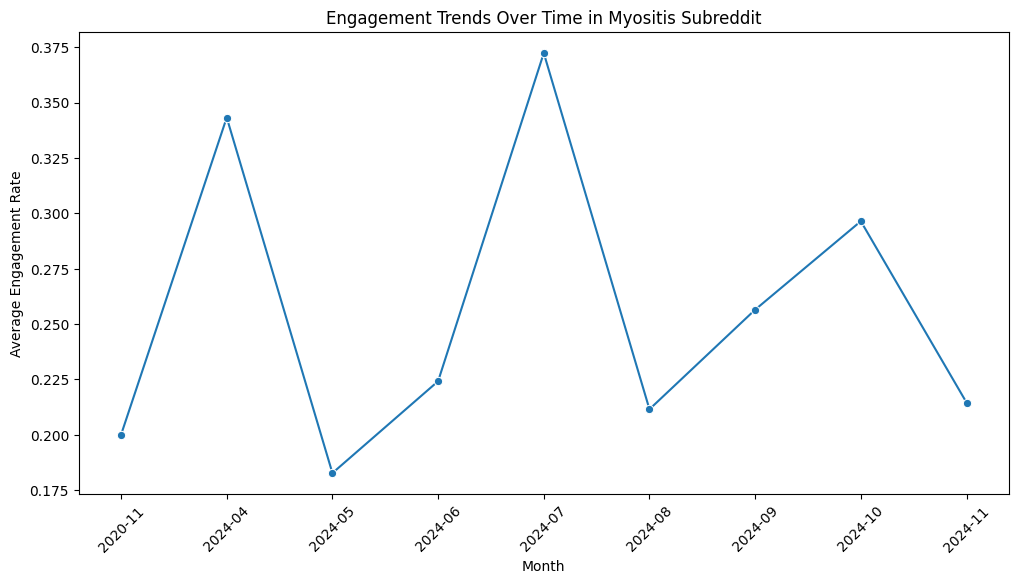

In [19]:
# Convert post_created_utc to datetime if not already done
df['post_created_utc'] = pd.to_datetime(df['post_created_utc'], errors='coerce')

# Filter for Myositis posts
myositis_df = df[df['subreddit'] == 'Myositis'].copy()

# Create a 'month' column for grouping
myositis_df.loc[:, 'month'] = myositis_df['post_created_utc'].dt.to_period('M')

# Aggregate engagement by month
monthly_engagement = (
    myositis_df.groupby('month')['post_engagement_rate'].mean().reset_index()
)

# Convert the 'month' column to string for visualization
monthly_engagement['month'] = monthly_engagement['month'].astype(str)

# Visualize engagement trends
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_engagement, x='month', y='post_engagement_rate', marker='o')
plt.title("Engagement Trends Over Time in Myositis Subreddit")
plt.xlabel("Month")
plt.ylabel("Average Engagement Rate")
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


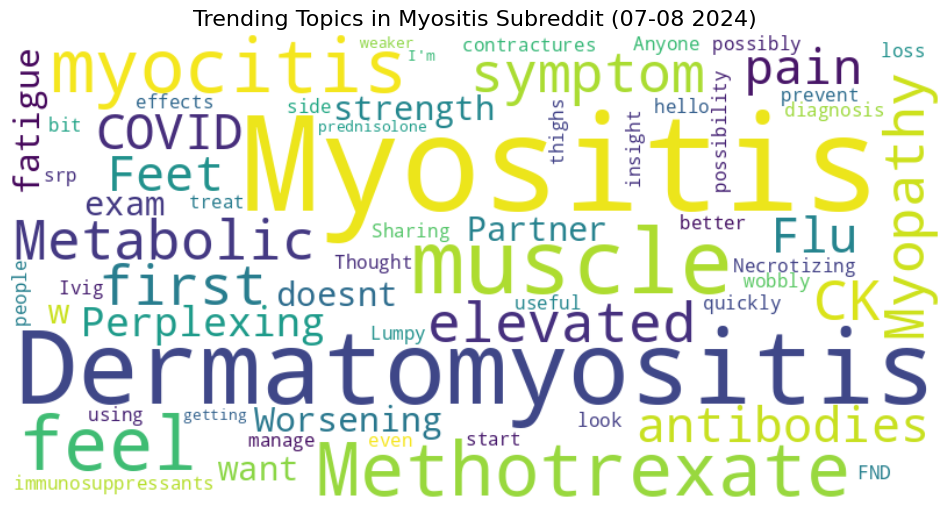

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the English stopwords
stop_words = set(stopwords.words('english'))

# Add any custom stopwords specific to your data
custom_stopwords = {'imuran', 'symptoms', 'one', 'like', 'get', 'also'}  # Add as needed
stop_words.update(custom_stopwords)

# Filter posts between June and August 2024
filtered_df = myositis_df[(myositis_df['post_created_utc'] >= '2024-07-01') &
                          (myositis_df['post_created_utc'] <= '2024-08-31')]

# Remove duplicates in posts based on the 'post_title' or 'post_content' column
filtered_df = filtered_df.drop_duplicates(subset='post_title', keep='first')

# If you have comments, remove duplicates in comments as well (assuming 'comment_text' is the comment column)
if 'comment_text' in filtered_df.columns:
    filtered_df = filtered_df.drop_duplicates(subset='comment_text', keep='first')

# Combine all post titles or content (choose the appropriate column, e.g., 'post_title' or 'post_content')
text = ' '.join(filtered_df['post_title'].dropna())  # Replace 'post_title' with the correct column name

# Generate the WordCloud with stopwords removed
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(text)

# Plot the WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Trending Topics in Myositis Subreddit (07-08 2024)', fontsize=16)
plt.show()


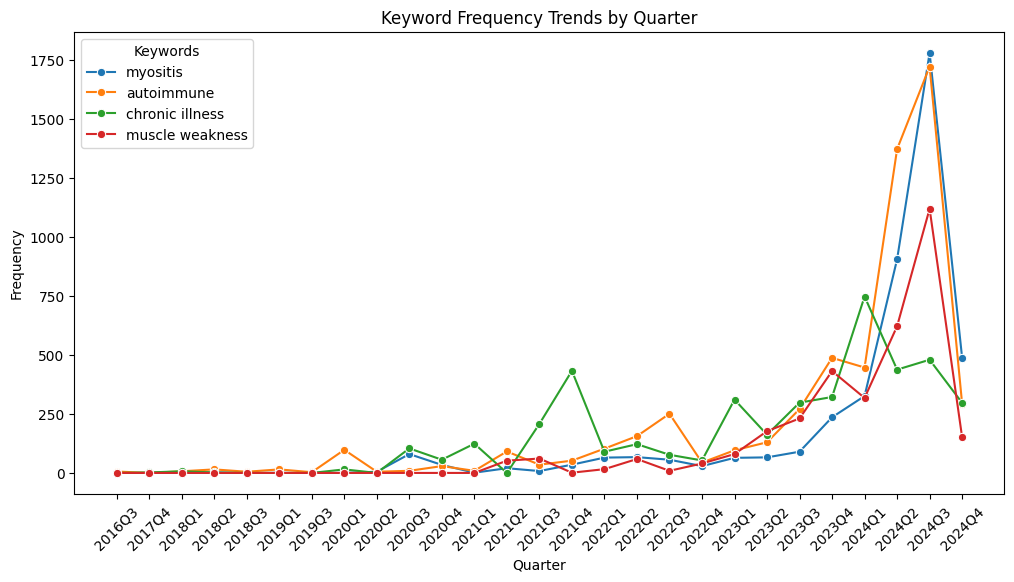

In [21]:
# Convert post_created_utc to datetime if not already done
df['post_created_utc'] = pd.to_datetime(df['post_created_utc'], errors='coerce')

# Filter for Myositis posts and group by quarter
df['quarter'] = df['post_created_utc'].dt.to_period('Q')

# Ensure keywords and count by quarter
keywords = ['myositis', 'autoimmune', 'chronic illness', 'muscle weakness']

# Create keyword trends DataFrame
keyword_counts = {
    keyword: df[df['post_content'].str.contains(keyword, na=False)].groupby('quarter').size()
    for keyword in keywords
}

# Convert to DataFrame
keyword_trends = pd.DataFrame(keyword_counts).fillna(0)

# Reset index and melt for easier plotting
keyword_trends.reset_index(inplace=True)
keyword_trends = keyword_trends.melt(id_vars='quarter', var_name='Keyword', value_name='Frequency')

# Convert 'quarter' to string for plotting
keyword_trends['quarter'] = keyword_trends['quarter'].astype(str)

# Plot keyword frequency trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=keyword_trends, x='quarter', y='Frequency', hue='Keyword', marker='o')
plt.title("Keyword Frequency Trends by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Frequency")
plt.legend(title="Keywords")
plt.xticks(rotation=45)
plt.show()


<ipython-input-22-ef3c1343bb76>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_contributors, x='contributions', y='author', palette='viridis')


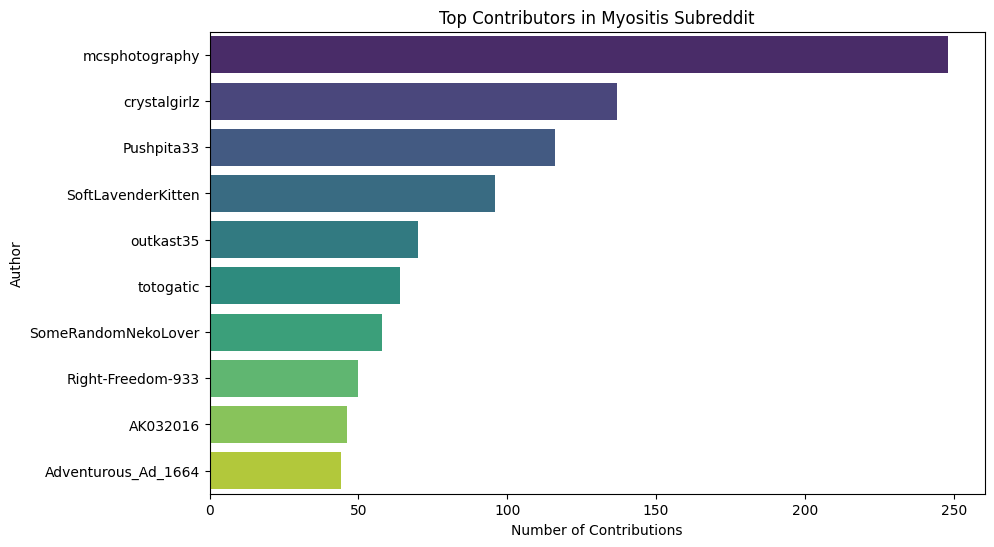

In [22]:
# Contribution count by user
user_contributions = myositis_df['post_author'].value_counts().reset_index()
user_contributions.columns = ['author', 'contributions']

# Visualize top contributors
top_contributors = user_contributions.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_contributors, x='contributions', y='author', palette='viridis')
plt.title("Top Contributors in Myositis Subreddit")
plt.xlabel("Number of Contributions")
plt.ylabel("Author")
plt.show()


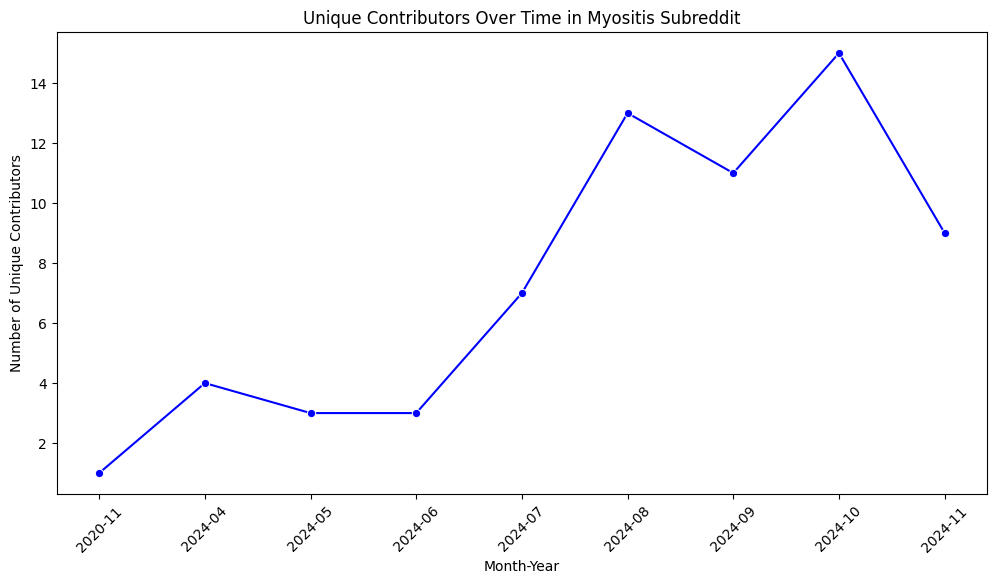

In [23]:
# Ensure datetime conversion
df['post_created_utc'] = pd.to_datetime(df['post_created_utc'], errors='coerce')

# Filter for Myositis and make a copy
myositis_df = df[df['subreddit'] == 'Myositis'].copy()

# Extract month and year as a period
myositis_df['month_year'] = myositis_df['post_created_utc'].dt.to_period('M')

# Count unique contributors per month
contributors_trend = myositis_df.groupby('month_year')['post_author'].nunique().reset_index()
contributors_trend.columns = ['month_year', 'unique_contributors']

# Convert `month_year` to string for plotting
contributors_trend['month_year'] = contributors_trend['month_year'].astype(str)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=contributors_trend, x='month_year', y='unique_contributors', marker='o', color='blue')
plt.title("Unique Contributors Over Time in Myositis Subreddit")
plt.xlabel("Month-Year")
plt.ylabel("Number of Unique Contributors")
plt.xticks(rotation=45)
plt.show()


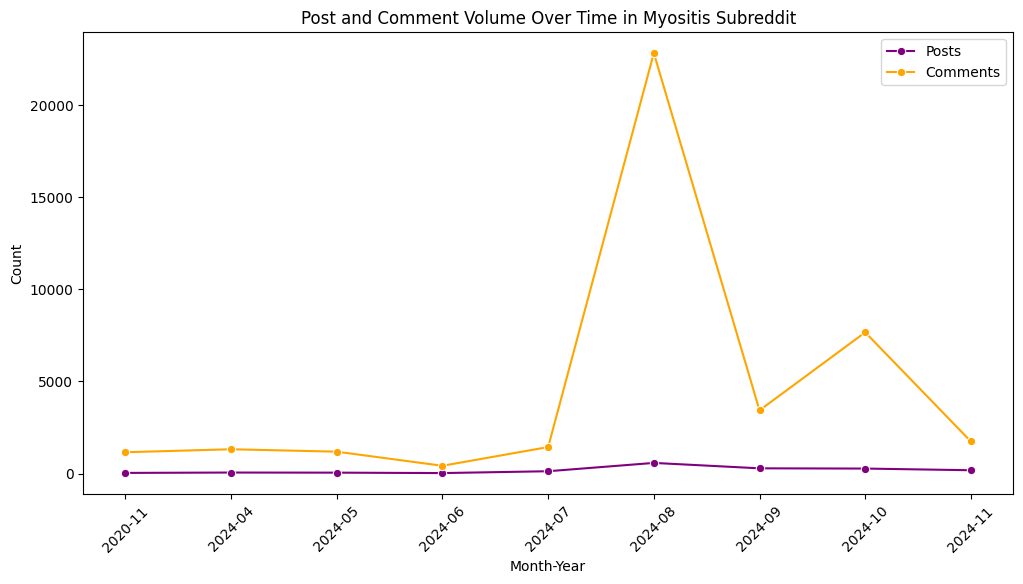

In [24]:
# Calculate post and comment volume per month
volume_trend = myositis_df.groupby('month_year').agg({
    'post_title': 'count',
    'post_comments_count': 'sum'
}).reset_index()
volume_trend.columns = ['month_year', 'total_posts', 'total_comments']

# Convert `month_year` to string for plotting
volume_trend['month_year'] = volume_trend['month_year'].astype(str)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=volume_trend, x='month_year', y='total_posts', label='Posts', marker='o', color='purple')
sns.lineplot(data=volume_trend, x='month_year', y='total_comments', label='Comments', marker='o', color='orange')
plt.title("Post and Comment Volume Over Time in Myositis Subreddit")
plt.xlabel("Month-Year")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [25]:
# Filter for Myositis subreddit
myositis_df = df[df['subreddit'] == 'Myositis'].copy()

# Aggregate engagement metrics for each contributor
top_contributors = myositis_df.groupby('post_author').agg({
    'post_upvotes': 'sum',
    'post_comments_count': 'sum',
    'post_title': 'count'  # Total number of posts by the author
}).reset_index()

# Calculate total engagement (upvotes + comments)
top_contributors['total_engagement'] = top_contributors['post_upvotes'] + top_contributors['post_comments_count']

# Sort by total engagement and select top contributors
top_contributors = top_contributors.sort_values(by='total_engagement', ascending=False).head(10)

# Rename columns for clarity
top_contributors.rename(columns={'post_title': 'total_posts'}, inplace=True)

from IPython.display import display

print("Top Contributors in Myositis Subreddit:")
display(top_contributors)



Top Contributors in Myositis Subreddit:


post_author  post_upvotes  post_comments_count  total_posts  \
45       mcsphotography          1872                16532          248   
22           Pushpita33           348                 5008          116   
38         crystalgirlz           466                 3081          137   
1   Adventurous_Ad_1664           220                 1936           44   
29  SomeRandomNekoLover           232                 1682           58   
24    Right-Freedom-933           375                 1300           50   
48            qqqyyyiii           238                 1156           34   
52            totogatic           474                  748           64   
28   SoftLavenderKitten           263                  774           96   
33            Villenemo            62                  930           31   

    total_engagement  
45             18404  
22              5356  
38              3547  
1               2156  
29              1914  
24              1675  
48              1394  
52              1222  
28              1037  
33               992

<ipython-input-26-15bbbf149fd8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_contributors, x='post_author', y='post_sentiment', palette='coolwarm')


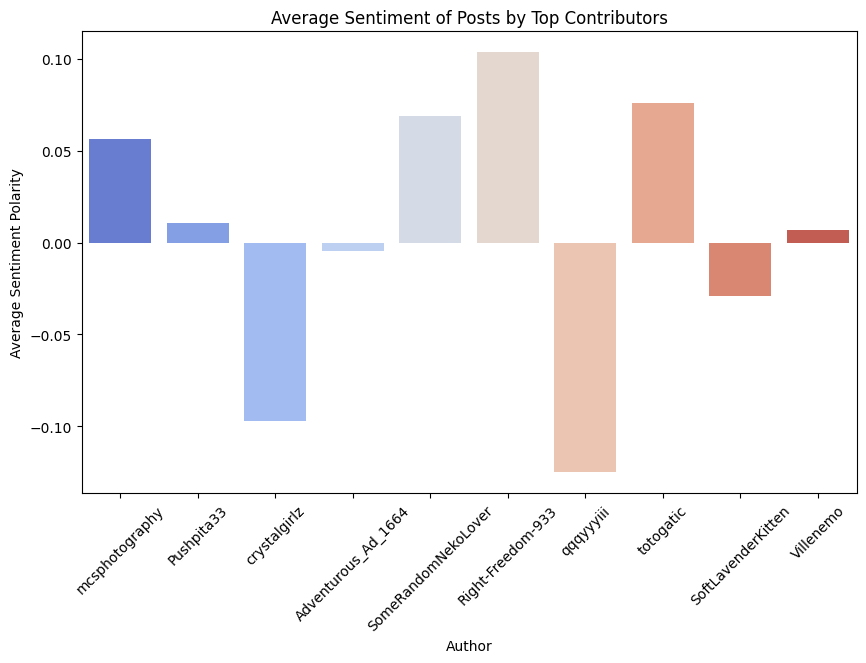

In [26]:
# Filter posts by top contributors
top_authors = top_contributors['post_author']
top_contributor_posts = myositis_df[myositis_df['post_author'].isin(top_authors)]

# Calculate average sentiment for posts by each top contributor
top_contributor_sentiment = top_contributor_posts.groupby('post_author')['post_sentiment'].mean().reset_index()

# Merge sentiment data with engagement metrics
top_contributors = pd.merge(top_contributors, top_contributor_sentiment, on='post_author')

# Visualize average sentiment of top contributors
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=top_contributors, x='post_author', y='post_sentiment', palette='coolwarm')
plt.title("Average Sentiment of Posts by Top Contributors")
plt.xlabel("Author")
plt.ylabel("Average Sentiment Polarity")
plt.xticks(rotation=45)
plt.show()


In [27]:
# Combine all contributors from posts and comments
all_contributors = pd.concat([
    myositis_df['post_author'],      # Authors of posts
    myositis_df['comment_author']    # Authors of comments
])

# Find total unique contributors by counting unique entries
total_contributors = all_contributors.nunique()

# Display the total number of unique contributors
print(f"Total unique contributors from posts and comments: {total_contributors}")


Total unique contributors from posts and comments: 153


post_category        help-seeking  neutral  support-offering
post_author                                                 
AK032016                       42        4                 0
Adventurous_Ad_1664             0       44                 0
Pushpita33                     20       96                 0
Right-Freedom-933              50        0                 0
SoftLavenderKitten             96        0                 0
SomeRandomNekoLover            58        0                 0
crystalgirlz                   35      102                 0
mcsphotography                 90      158                 0
outkast35                      42       28                 0
totogatic                       0       12                52


<ipython-input-28-c5fc66ba17b4>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_contributor_posts['post_category'] = top_contributor_posts['post_content'].apply(categorize_post)


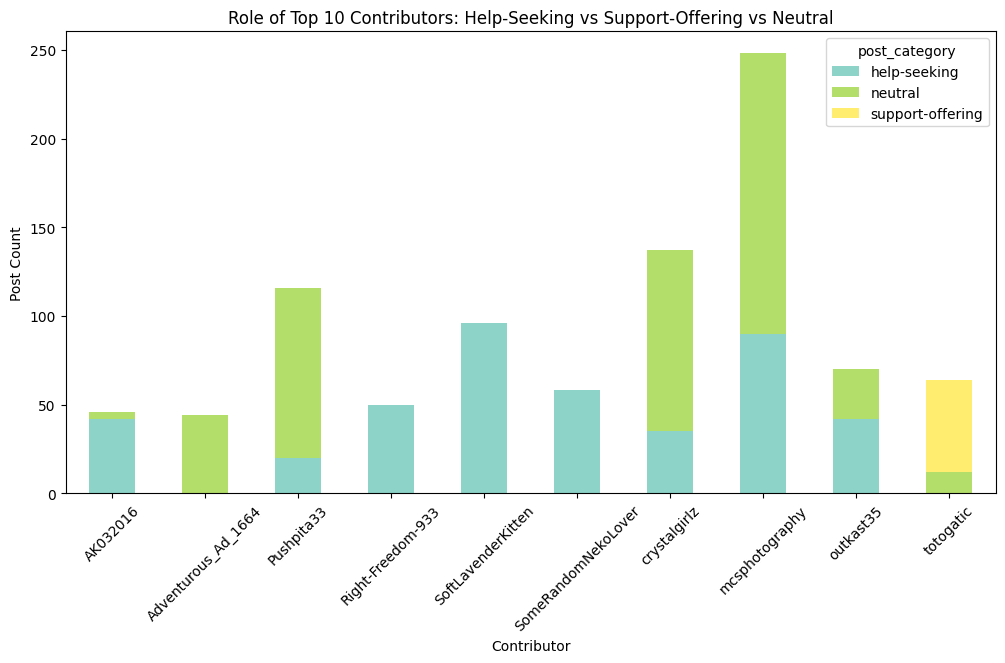

In [28]:
# Step 1: Find the top 10 contributors based on the number of posts
top_contributors = myositis_df['post_author'].value_counts().head(10).index

# Step 2: Filter the posts by the top 10 contributors
top_contributor_posts = myositis_df[myositis_df['post_author'].isin(top_contributors)]

# Combine post content by each top contributor
top_contributor_text = top_contributor_posts.groupby('post_author')['post_content'].apply(lambda x: " ".join(x))

# Step 3: Display the top keywords/themes using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

vectorizer = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
word_counts = vectorizer.fit_transform(top_contributor_text)
words = vectorizer.get_feature_names_out()
word_frequencies = word_counts.sum(axis=0).A1

# Create a DataFrame for visualization
word_freq_df = pd.DataFrame({'word': words, 'frequency': word_frequencies})
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False).head(10)



# Step 4: Define keywords for help-seeking and support-offering
help_seeking_keywords = ['help', 'advice', 'question', 'anyone', 'please']
support_offering_keywords = ['hope', 'advice', 'suggest', 'recommend', 'understand', 'sharing']

# Function to categorize a post as help-seeking, support-offering, or neutral
def categorize_post(content):
    content = content.lower()
    if any(word in content for word in help_seeking_keywords):
        return 'help-seeking'
    elif any(word in content for word in support_offering_keywords):
        return 'support-offering'
    else:
        return 'neutral'

# Step 5: Apply categorization to posts of top contributors
top_contributor_posts['post_category'] = top_contributor_posts['post_content'].apply(categorize_post)

# Step 6: Analyze the roles of the top contributors (help-seeking, support-offering, neutral)
contributor_role_count = top_contributor_posts.groupby(['post_author', 'post_category']).size().unstack(fill_value=0)


# Display the result of roles by contributor
print(contributor_role_count)

# Optionally, you can plot the distribution of categories for each contributor
contributor_role_count.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Role of Top 10 Contributors: Help-Seeking vs Support-Offering vs Neutral')
plt.xlabel('Contributor')
plt.ylabel('Post Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-29-2d9e12ca4aa0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_contributor_data['category'] = top_contributor_data['content'].apply(categorize_content)


category              help-seeking  neutral  support-offering
author                                                       
AK032016                         8       33                 9
Pushpita33                       2       20                 4
SoftLavenderKitten              10        9                 4
Top_Complaint8816               13       26                 5
UpperYogurtcloset121             1       31                 0
bingusboy123                     0       17                 4
chipsahoymateys                  7       19                 7
crystalgirlz                    16       45                 6
hasta-la-cheesta                 7       18                 4
mcsphotography                   6       40                 0


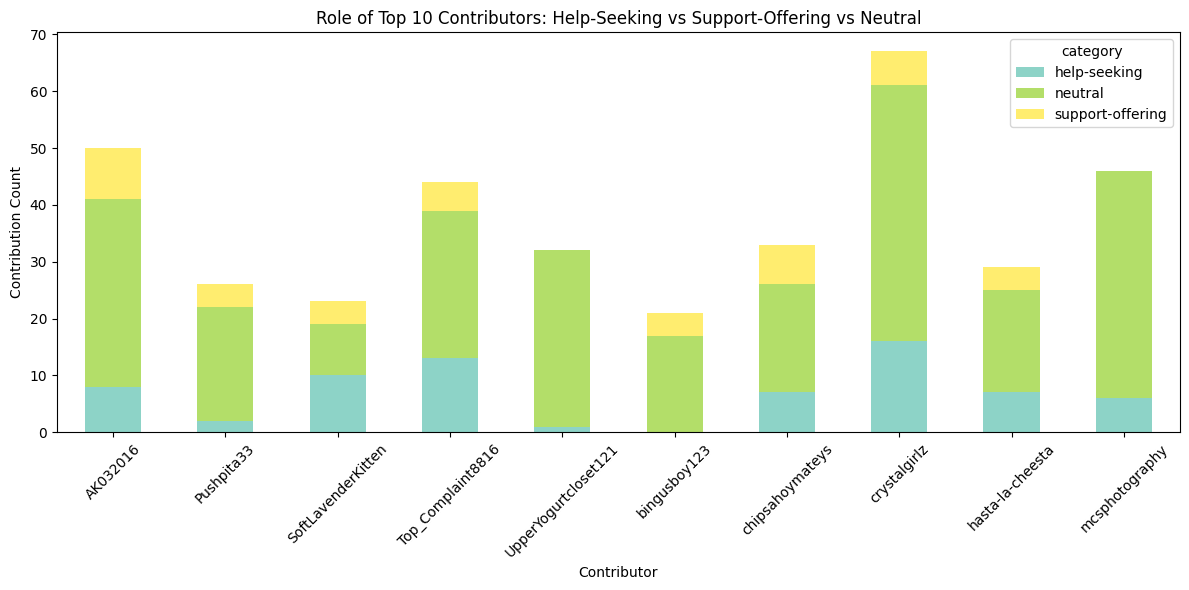

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Step 1: Remove duplicate posts and comments
posts = myositis_df[['post_author', 'post_content']].drop_duplicates(subset='post_content').copy()
posts.columns = ['author', 'content']

comments = myositis_df[['comment_author', 'comment_content']].drop_duplicates(subset='comment_content').copy()
comments.columns = ['author', 'content']

# Combine posts and comments
combined_data = pd.concat([posts, comments], ignore_index=True)

# Remove rows with missing values
combined_data = combined_data.dropna(subset=['author', 'content'])

# Step 2: Identify the top 10 contributors
top_contributors = combined_data['author'].value_counts().head(10).index

# Filter for contributions from the top 10 contributors
top_contributor_data = combined_data[combined_data['author'].isin(top_contributors)]

# Step 3: Define keywords for help-seeking and support-offering roles
help_seeking_keywords = ['help', 'advice', 'question', 'anyone', 'please']
support_offering_keywords = ['hope', 'advice', 'suggest', 'recommend', 'understand', 'sharing']

# Function to categorize content
def categorize_content(content):
    content = content.lower()
    if any(word in content for word in help_seeking_keywords):
        return 'help-seeking'
    elif any(word in content for word in support_offering_keywords):
        return 'support-offering'
    else:
        return 'neutral'

# Step 4: Apply categorization
top_contributor_data['category'] = top_contributor_data['content'].apply(categorize_content)

# Step 5: Analyze the roles of the top contributors
# Group by author and category to count the number of each category per contributor
contributor_role_count = top_contributor_data.groupby(['author', 'category']).size().unstack(fill_value=0)

# Display the result
print(contributor_role_count)

# Step 6: Visualization
# Stacked bar chart
contributor_role_count.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Role of Top 10 Contributors: Help-Seeking vs Support-Offering vs Neutral')
plt.xlabel('Contributor')
plt.ylabel('Contribution Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


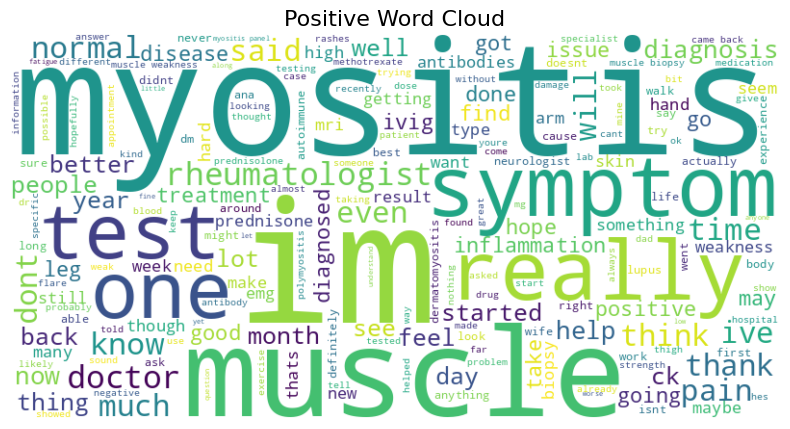

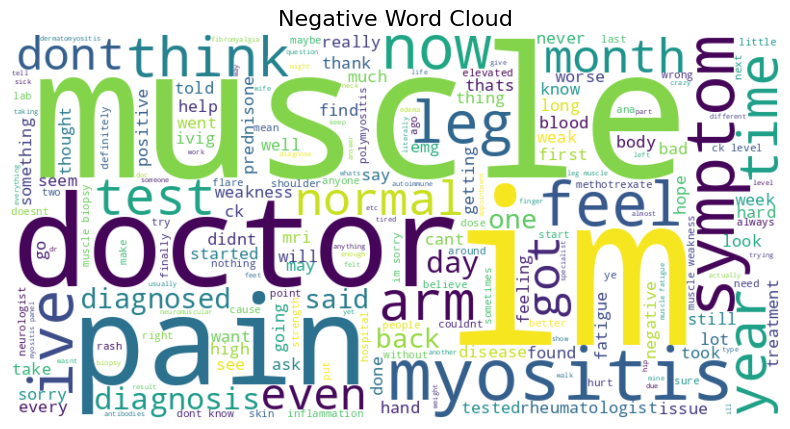

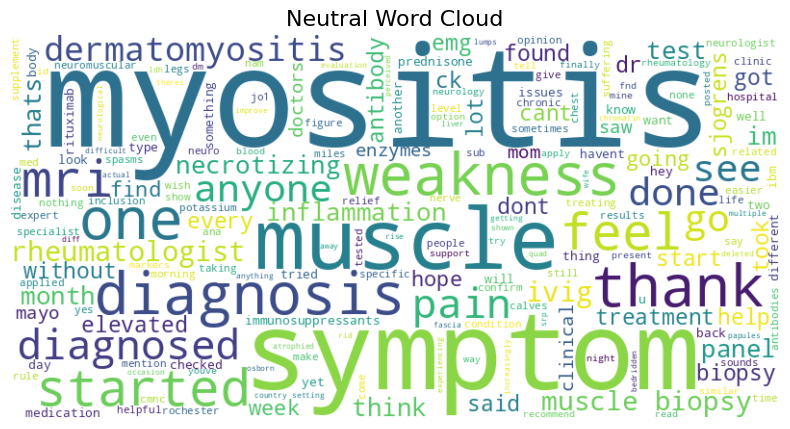

In [30]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Remove duplicate posts and comments
# Assuming `myositis_df` is your DataFrame
posts = myositis_df[['post_content', 'post_sentiment']].drop_duplicates(subset='post_content').copy()
comments = myositis_df[['comment_content', 'comment_sentiment']].drop_duplicates(subset='comment_content').copy()

# Combine posts and comments into a single dataset
posts.columns = ['content', 'sentiment']
comments.columns = ['content', 'sentiment']
combined_data = pd.concat([posts, comments], ignore_index=True)
combined_data = combined_data.dropna(subset=['content', 'sentiment']).reset_index(drop=True)

# Step 2: Define a function to categorize content into positive, negative, and neutral
def categorize_sentiment(sentiment):
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

combined_data['category'] = combined_data['sentiment'].apply(categorize_sentiment)

# Step 3: Generate text for each sentiment category
positive_text = " ".join(combined_data[combined_data['category'] == 'positive']['content'])
negative_text = " ".join(combined_data[combined_data['category'] == 'negative']['content'])
neutral_text = " ".join(combined_data[combined_data['category'] == 'neutral']['content'])

# Step 4: Function to generate word clouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Step 5: Generate word clouds for each category
generate_wordcloud(positive_text, "Positive Word Cloud")
generate_wordcloud(negative_text, "Negative Word Cloud")
generate_wordcloud(neutral_text, "Neutral Word Cloud")


<ipython-input-31-4da045f09df2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_freq_df, x='frequency', y='word', palette='viridis')


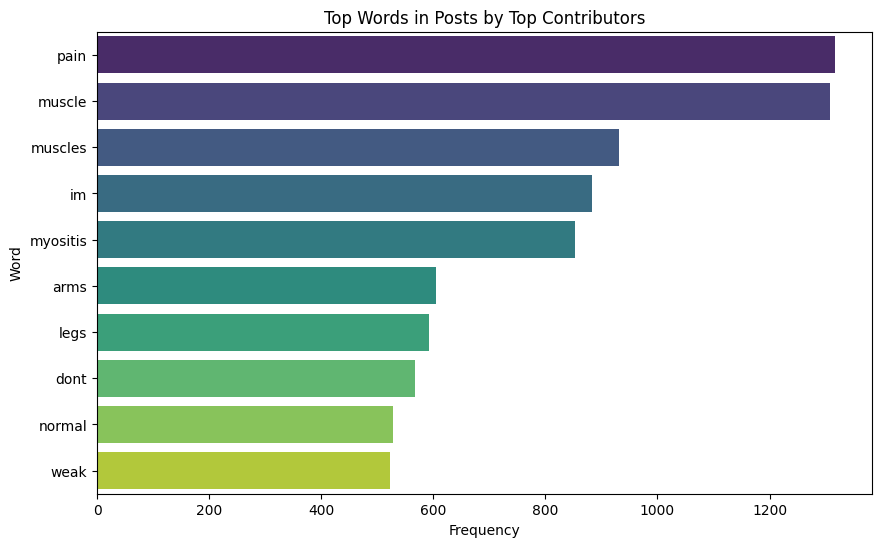

In [31]:
# Combine post content by each top contributor
top_contributor_text = top_contributor_posts.groupby('post_author')['post_content'].apply(lambda x: " ".join(x))

# Display the top keywords/themes
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
word_counts = vectorizer.fit_transform(top_contributor_text)
words = vectorizer.get_feature_names_out()
word_frequencies = word_counts.sum(axis=0).A1

# Create a DataFrame for visualization
word_freq_df = pd.DataFrame({'word': words, 'frequency': word_frequencies})
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False).head(10)

# Plot top words/themes
plt.figure(figsize=(10, 6))
sns.barplot(data=word_freq_df, x='frequency', y='word', palette='viridis')
plt.title("Top Words in Posts by Top Contributors")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()




In [32]:
# Define keywords for help-seeking and support-offering
help_seeking_keywords = ['help', 'advice', 'question', 'anyone', 'please']
support_offering_keywords = ['hope', 'advice', 'suggest', 'recommend', 'understand', 'sharing']

# Categorize posts as help-seeking or support-offering
def categorize_post(content):
    content = content.lower()
    if any(word in content for word in help_seeking_keywords):
        return 'help-seeking'
    elif any(word in content for word in support_offering_keywords):
        return 'support-offering'
    else:
        return 'neutral'

myositis_df['post_category'] = myositis_df['post_content'].apply(categorize_post)
myositis_df['comment_category'] = myositis_df['comment_content'].apply(categorize_post)


<ipython-input-33-a8ffebd0973f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=post_sentiment_by_category, x='post_category', y='post_sentiment', palette='coolwarm')


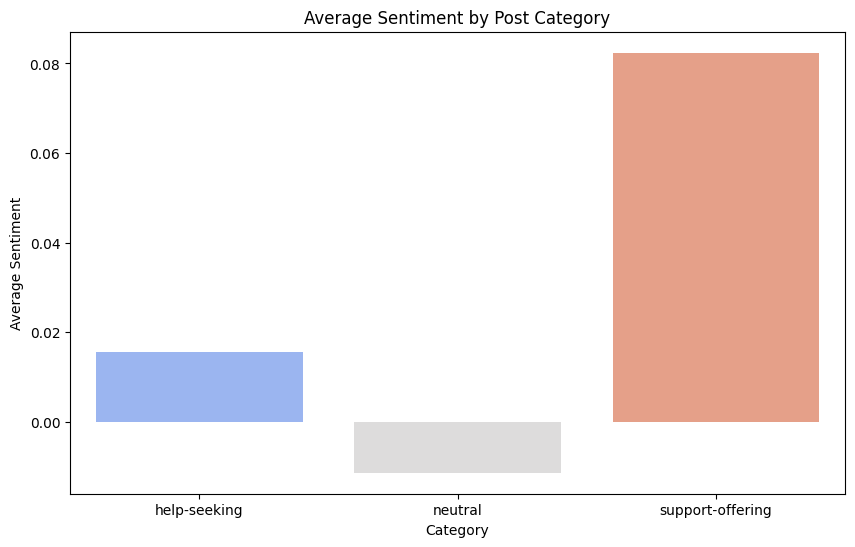

<ipython-input-33-a8ffebd0973f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comment_sentiment_by_category, x='comment_category', y='comment_sentiment', palette='viridis')


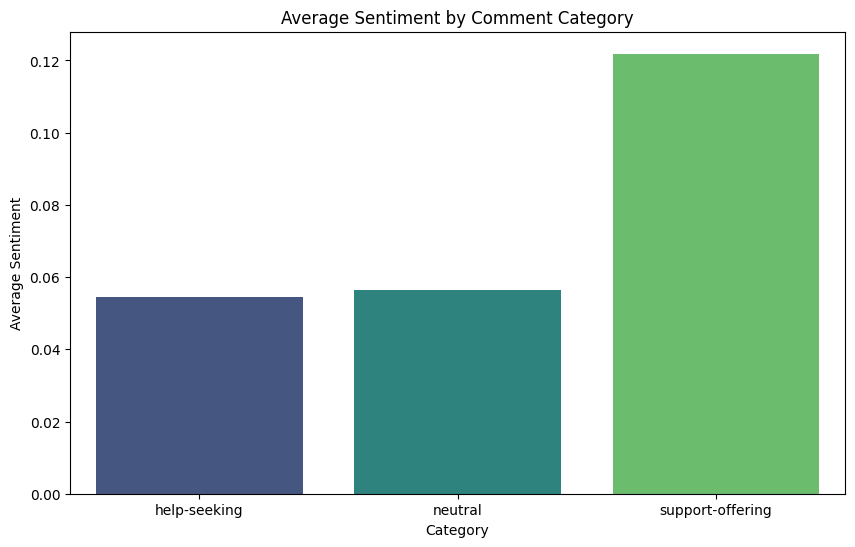

In [33]:
# Calculate average sentiment for each category
post_sentiment_by_category = myositis_df.groupby('post_category')['post_sentiment'].mean().reset_index()
comment_sentiment_by_category = myositis_df.groupby('comment_category')['comment_sentiment'].mean().reset_index()

# Visualize post sentiment
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=post_sentiment_by_category, x='post_category', y='post_sentiment', palette='coolwarm')
plt.title("Average Sentiment by Post Category")
plt.xlabel("Category")
plt.ylabel("Average Sentiment")
plt.show()

# Visualize comment sentiment
plt.figure(figsize=(10, 6))
sns.barplot(data=comment_sentiment_by_category, x='comment_category', y='comment_sentiment', palette='viridis')
plt.title("Average Sentiment by Comment Category")
plt.xlabel("Category")
plt.ylabel("Average Sentiment")
plt.show()


<ipython-input-34-899bf670c9b9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engagement_by_post_category, x='post_category', y='post_engagement_rate', palette='pastel')


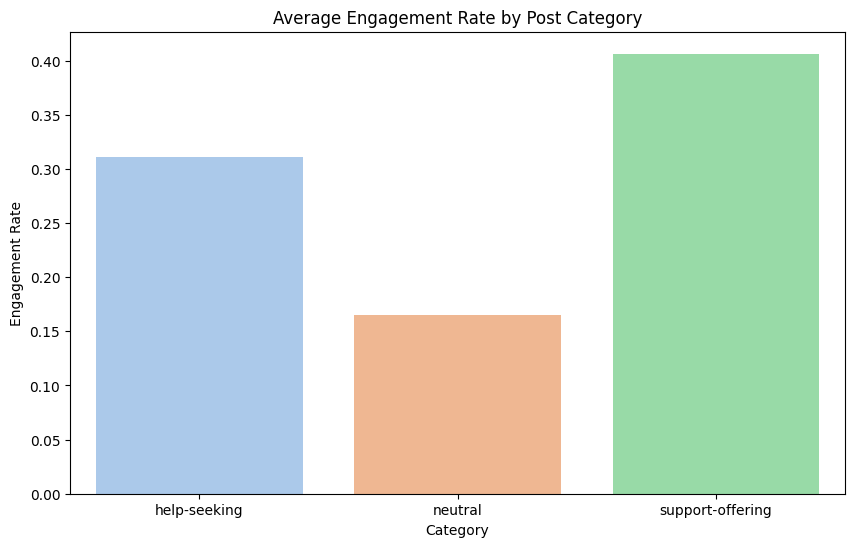

<ipython-input-34-899bf670c9b9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engagement_by_comment_category, x='comment_category', y='comment_engagement_rate', palette='muted')


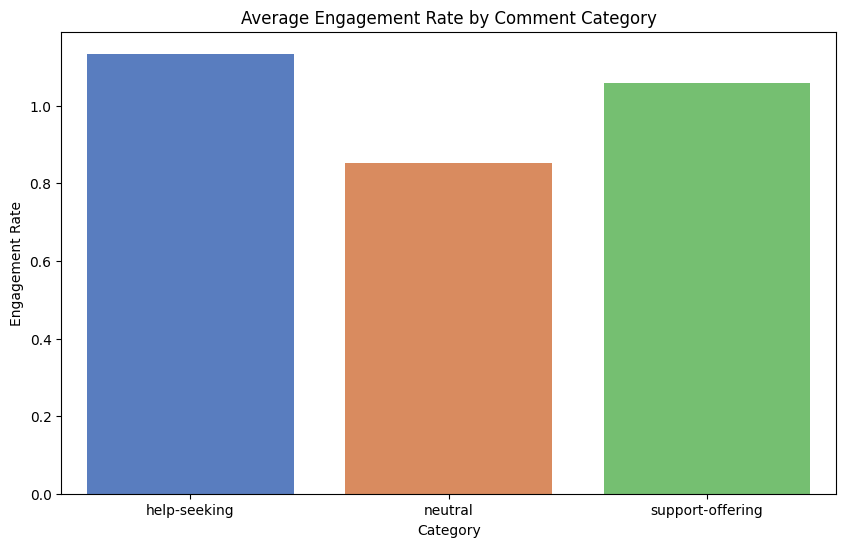

In [34]:
# Calculate average engagement rates by category
engagement_by_post_category = myositis_df.groupby('post_category')['post_engagement_rate'].mean().reset_index()
engagement_by_comment_category = myositis_df.groupby('comment_category')['comment_engagement_rate'].mean().reset_index()

# Visualize post engagement
plt.figure(figsize=(10, 6))
sns.barplot(data=engagement_by_post_category, x='post_category', y='post_engagement_rate', palette='pastel')
plt.title("Average Engagement Rate by Post Category")
plt.xlabel("Category")
plt.ylabel("Engagement Rate")
plt.show()

# Visualize comment engagement
plt.figure(figsize=(10, 6))
sns.barplot(data=engagement_by_comment_category, x='comment_category', y='comment_engagement_rate', palette='muted')
plt.title("Average Engagement Rate by Comment Category")
plt.xlabel("Category")
plt.ylabel("Engagement Rate")
plt.show()


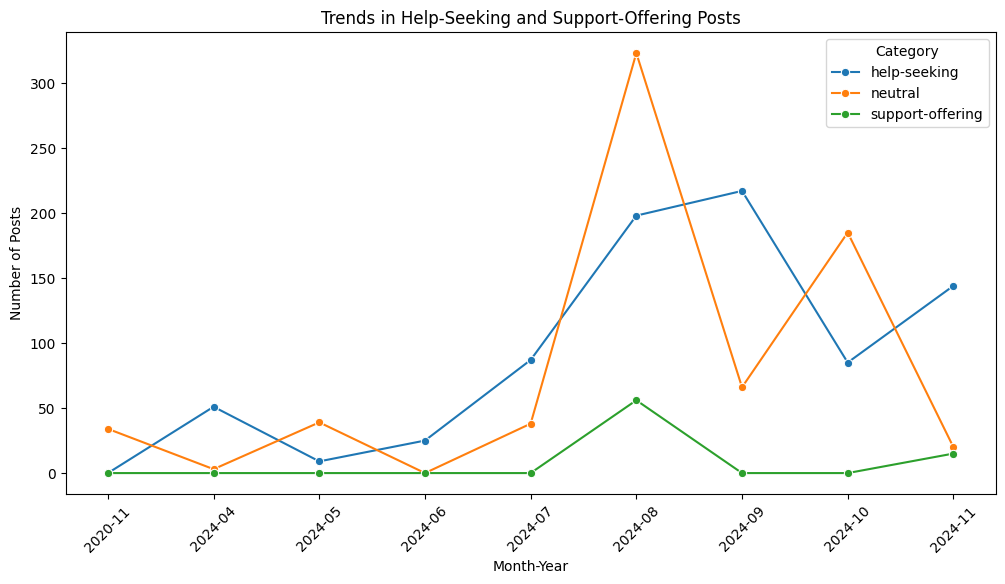

In [35]:
# Add month-year column for temporal analysis
myositis_df['month_year'] = myositis_df['post_created_utc'].dt.to_period('M')

# Count categories over time
category_trends = myositis_df.groupby(['month_year', 'post_category']).size().unstack(fill_value=0).reset_index()
category_trends_melted = category_trends.melt(id_vars='month_year', var_name='category', value_name='count')

# Convert month_year to string for plotting
category_trends_melted['month_year'] = category_trends_melted['month_year'].astype(str)

# Plot trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=category_trends_melted, x='month_year', y='count', hue='category', marker='o')
plt.title("Trends in Help-Seeking and Support-Offering Posts")
plt.xlabel("Month-Year")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.show()


<ipython-input-36-69091b2e96d6>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subreddit_engagement, x='Subreddit', y='Average Engagement Rate', palette='viridis')


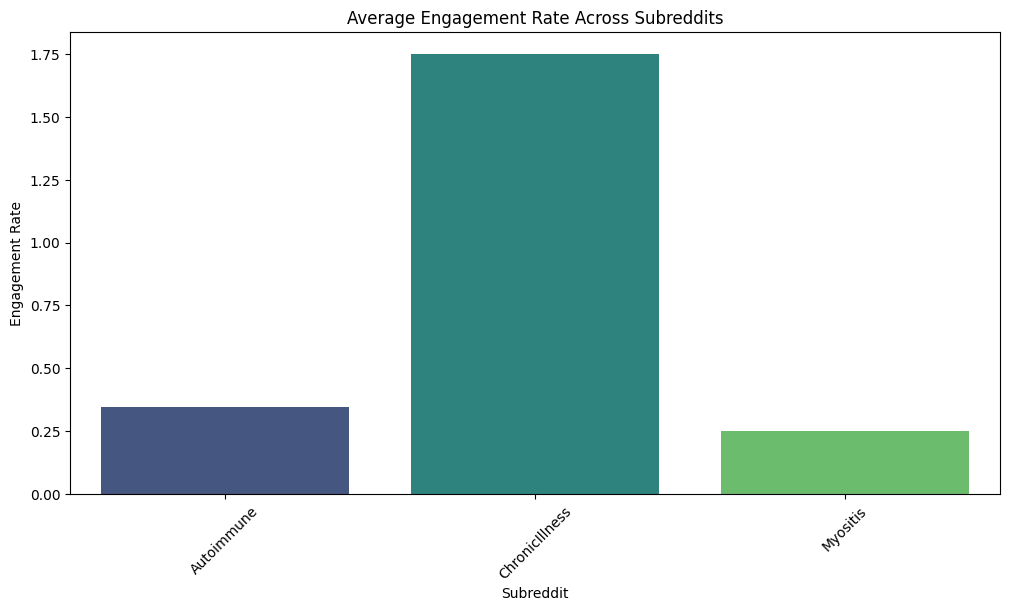

In [36]:
# Group data by subreddit and calculate engagement metrics
subreddit_engagement = df.groupby('subreddit').agg({
    'post_upvotes': 'mean',
    'post_comments_count': 'mean',
    'post_engagement_rate': 'mean'
}).reset_index()

# Rename columns for clarity
subreddit_engagement.columns = ['Subreddit', 'Average Upvotes', 'Average Comments', 'Average Engagement Rate']

# Plot engagement metrics
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=subreddit_engagement, x='Subreddit', y='Average Engagement Rate', palette='viridis')
plt.title("Average Engagement Rate Across Subreddits")
plt.xlabel("Subreddit")
plt.ylabel("Engagement Rate")
plt.xticks(rotation=45)
plt.show()


<ipython-input-37-e9dc90a9056e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subreddit_sentiment, x='Subreddit', y='Average Post Sentiment', palette='coolwarm')


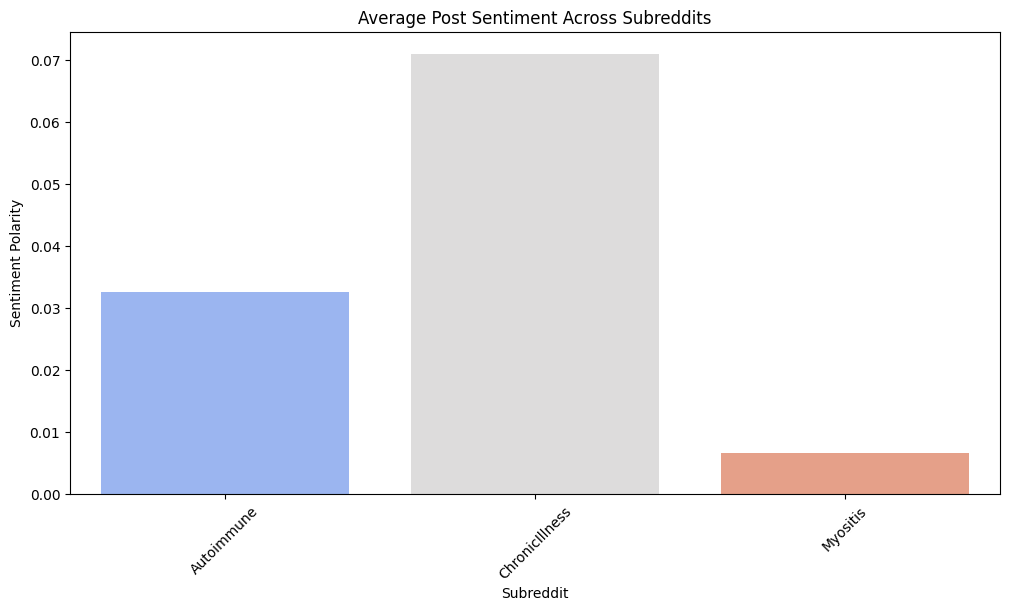

<ipython-input-37-e9dc90a9056e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subreddit_sentiment, x='Subreddit', y='Average Comment Sentiment', palette='coolwarm')


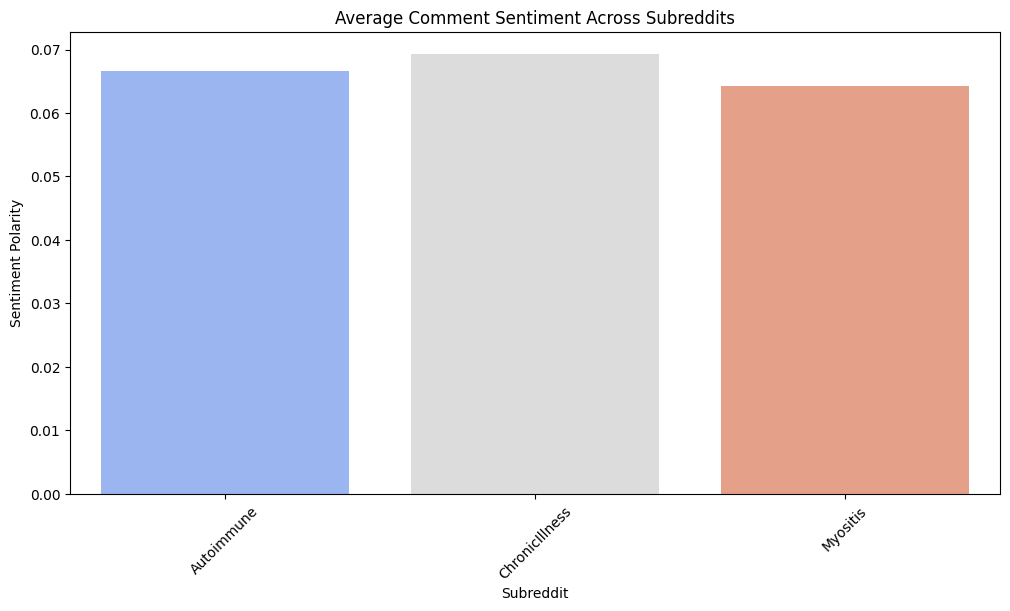

In [37]:
# Calculate average sentiment for each subreddit
subreddit_sentiment = df.groupby('subreddit').agg({
    'post_sentiment': 'mean',
    'comment_sentiment': 'mean'
}).reset_index()

# Rename columns
subreddit_sentiment.columns = ['Subreddit', 'Average Post Sentiment', 'Average Comment Sentiment']

# Plot sentiment comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=subreddit_sentiment, x='Subreddit', y='Average Post Sentiment', palette='coolwarm')
plt.title("Average Post Sentiment Across Subreddits")
plt.xlabel("Subreddit")
plt.ylabel("Sentiment Polarity")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=subreddit_sentiment, x='Subreddit', y='Average Comment Sentiment', palette='coolwarm')
plt.title("Average Comment Sentiment Across Subreddits")
plt.xlabel("Subreddit")
plt.ylabel("Sentiment Polarity")
plt.xticks(rotation=45)
plt.show()


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Prepare data: Combine post content and comment content for topic modeling
df['combined_content'] = df['post_content'] + " " + df['comment_content']

# Perform topic modeling for each subreddit
subreddits = df['subreddit'].unique()

for subreddit in subreddits:
    print(f"Topics for Subreddit: {subreddit}")
    subreddit_content = df[df['subreddit'] == subreddit]['combined_content'].dropna()

    # Vectorize the content
    vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(subreddit_content)

    # Apply LDA
    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(dtm)

    # Display topics
    def display_topics(model, feature_names, no_top_words):
        for idx, topic in enumerate(model.components_):
            print(f"Topic {idx + 1}:")
            print(" ".join([feature_names[i] for i in topic.argsort()[-no_top_words:]]))

    display_topics(lda, vectorizer.get_feature_names_out(), 10)
    print("\n")


Topics for Subreddit: Myositis
Topic 1:
muscles edema pain lower normal know dont mri myositis im
Topic 2:
months im getting started ive muscle myositis just dad pain
Topic 3:
contractures really myositis dont thank like arms pain muscle im
Topic 4:
tremors use trying im weeks weak myositis weakness muscles muscle
Topic 5:
weakness biopsy skin lung panel myositis like muscle pain symptoms


Topics for Subreddit: Autoimmune
Topic 1:
particularly body including vision loss muscles like skin symptoms muscle
Topic 2:
symptoms feel normal doctor just like pain ive months im
Topic 3:
really dont know ive like pain autoimmune symptoms just im
Topic 4:
body feels duration septdec left update like started symptoms pain
Topic 5:
tests said 2023 time pain blood just im like symptoms


Topics for Subreddit: ChronicIllness
Topic 1:
know better just pain dont ive illness symptoms chronic im
Topic 2:
chronic ive feel day like people im dont just pain
Topic 3:
time support know feel dont like people i

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


<ipython-input-39-317e81762c8c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=user_overlap, x='Number of Subreddits', y='Number of Users', palette='muted')


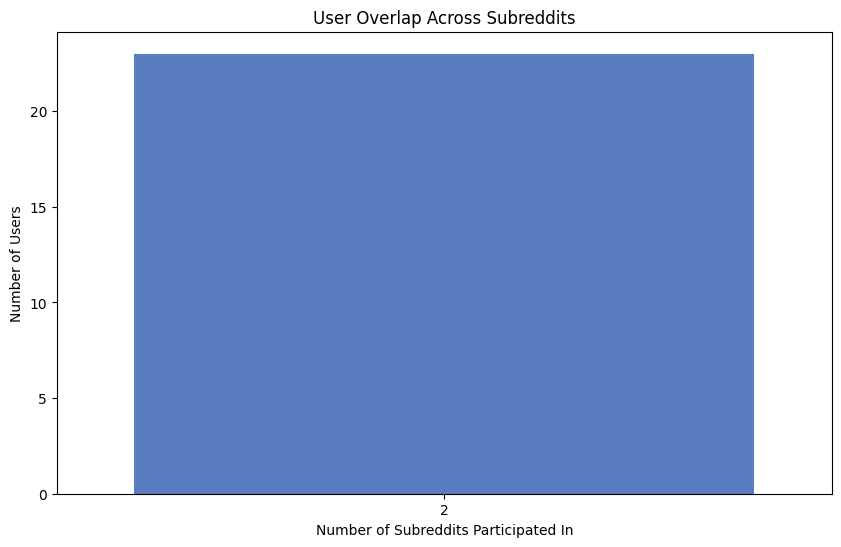

In [39]:
# Create a mapping of users to subreddits
user_subreddit_mapping = df.groupby('post_author')['subreddit'].apply(set).reset_index()
user_subreddit_mapping['subreddit_count'] = user_subreddit_mapping['subreddit'].apply(len)

# Identify users active in multiple subreddits
multi_subreddit_users = user_subreddit_mapping[user_subreddit_mapping['subreddit_count'] > 1]

# Visualize user overlap
user_overlap = multi_subreddit_users['subreddit_count'].value_counts().reset_index()
user_overlap.columns = ['Number of Subreddits', 'Number of Users']

plt.figure(figsize=(10, 6))
sns.barplot(data=user_overlap, x='Number of Subreddits', y='Number of Users', palette='muted')
plt.title("User Overlap Across Subreddits")
plt.xlabel("Number of Subreddits Participated In")
plt.ylabel("Number of Users")
plt.show()


<ipython-input-40-a4fa0cb46d15>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emotional_tone, x='subreddit', y='post_sentiment', palette='coolwarm')


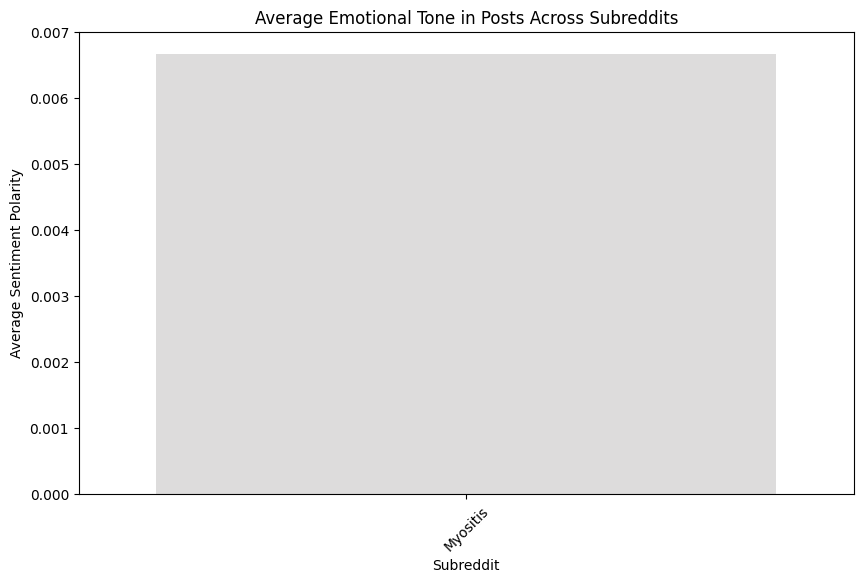

<ipython-input-40-a4fa0cb46d15>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emotional_tone, x='subreddit', y='comment_sentiment', palette='coolwarm')


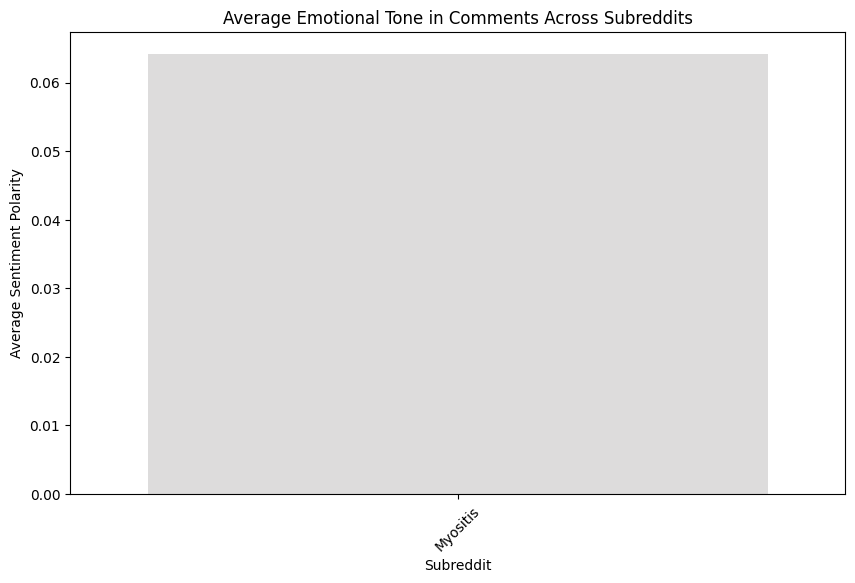

In [40]:
from textblob import TextBlob

# Calculate sentiment polarity for posts and comments
myositis_df['post_sentiment'] = myositis_df['post_content'].apply(lambda x: TextBlob(x).sentiment.polarity)
myositis_df['comment_sentiment'] = myositis_df['comment_content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Aggregate sentiment by post and comment
emotional_tone = myositis_df.groupby('subreddit').agg({
    'post_sentiment': 'mean',
    'comment_sentiment': 'mean'
}).reset_index()

# Visualize emotional tone
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=emotional_tone, x='subreddit', y='post_sentiment', palette='coolwarm')
plt.title("Average Emotional Tone in Posts Across Subreddits")
plt.xlabel("Subreddit")
plt.ylabel("Average Sentiment Polarity")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=emotional_tone, x='subreddit', y='comment_sentiment', palette='coolwarm')
plt.title("Average Emotional Tone in Comments Across Subreddits")
plt.xlabel("Subreddit")
plt.ylabel("Average Sentiment Polarity")
plt.xticks(rotation=45)
plt.show()


<ipython-input-41-1159f76b7fd9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=self_disclosure_summary.index, y=self_disclosure_summary.values, palette='viridis')


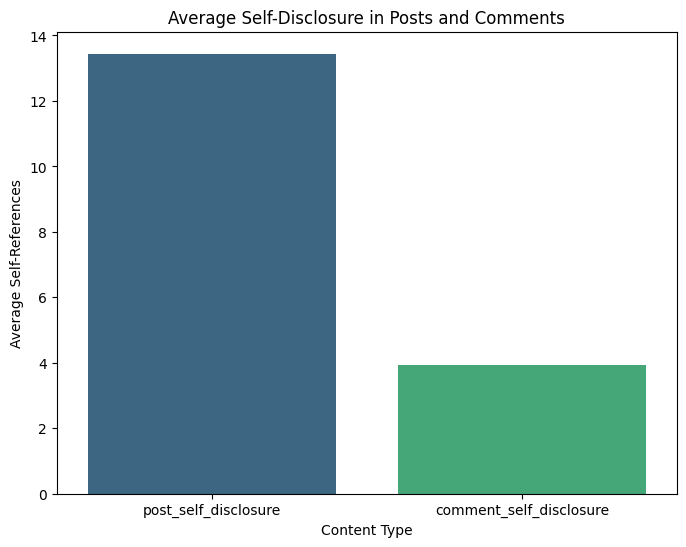

In [41]:
# Count self-references in posts and comments
self_references = ['i', 'me', 'my', 'mine', 'myself']
myositis_df['post_self_disclosure'] = myositis_df['post_content'].apply(
    lambda x: sum(1 for word in x.lower().split() if word in self_references)
)
myositis_df['comment_self_disclosure'] = myositis_df['comment_content'].apply(
    lambda x: sum(1 for word in x.lower().split() if word in self_references)
)

# Calculate average self-disclosure per post/comment
self_disclosure_summary = myositis_df[['post_self_disclosure', 'comment_self_disclosure']].mean()

# Visualize self-disclosure
plt.figure(figsize=(8, 6))
sns.barplot(x=self_disclosure_summary.index, y=self_disclosure_summary.values, palette='viridis')
plt.title("Average Self-Disclosure in Posts and Comments")
plt.xlabel("Content Type")
plt.ylabel("Average Self-References")
plt.show()


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Combine post and comment content
myositis_df['combined_content'] = myositis_df['post_content'] + " " + myositis_df['comment_content']

# Perform topic modeling
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(myositis_df['combined_content'].dropna())

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display topics
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[-no_top_words:]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)


Topic 1:
muscles edema pain lower normal know dont mri myositis im
Topic 2:
months im getting started ive muscle myositis just dad pain
Topic 3:
contractures really myositis dont thank like arms pain muscle im
Topic 4:
tremors use trying im weeks weak myositis weakness muscles muscle
Topic 5:
weakness biopsy skin lung panel myositis like muscle pain symptoms


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-43-ed7c4dbf99b8>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_df, x='Frequency', y='Word', palette='muted')


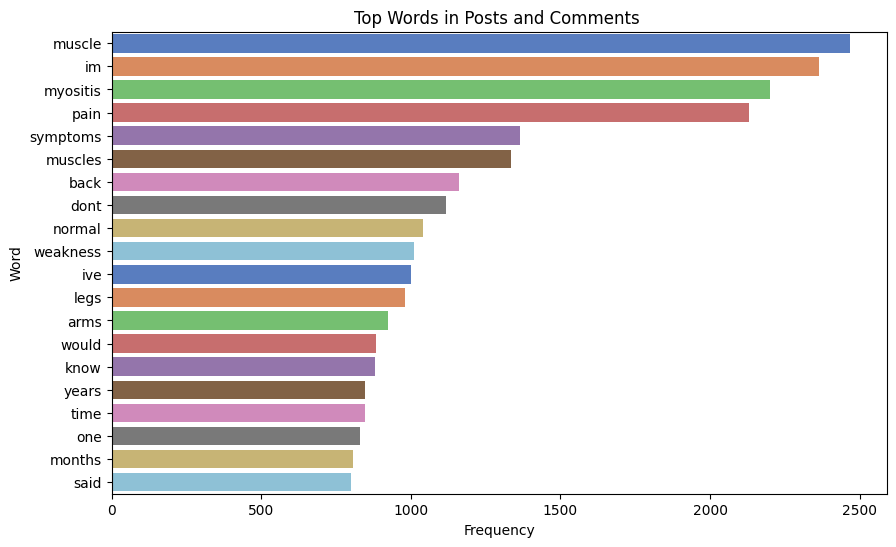

In [43]:
from collections import Counter
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Download stopwords if not already done
nltk.download('stopwords')

# Define stopwords and custom keywords to remove
stop_words = set(stopwords.words('english'))
custom_keywords = {'get', 'also', 'like', 'even', 'ck'}  # Add your custom keywords here
all_stopwords = stop_words.union(custom_keywords)

# Tokenize posts and comments
myositis_df['post_tokens'] = myositis_df['post_content'].apply(lambda x: x.lower().split() if pd.notna(x) else [])
myositis_df['comment_tokens'] = myositis_df['comment_content'].apply(lambda x: x.lower().split() if pd.notna(x) else [])

# Combine all tokens and remove stopwords and custom keywords
all_tokens = [token for tokens in myositis_df['post_tokens'] for token in tokens] + \
             [token for tokens in myositis_df['comment_tokens'] for token in tokens]
filtered_tokens = [word for word in all_tokens if word not in all_stopwords]

# Count top words
word_counts = Counter(filtered_tokens).most_common(20)

# Convert to DataFrame for visualization
word_df = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])

# Plotting the top words
plt.figure(figsize=(10, 6))
sns.barplot(data=word_df, x='Frequency', y='Word', palette='muted')
plt.title("Top Words in Posts and Comments ")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
